###Analyzing the loan case study

- Reading dataset
- Missing value analysis
- Transformation of dates
- Univariate Analysis
- Analysing numerical columns
- Outliers
- Bivariate analysis

###Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Avoid Warnings

In [5]:
import warnings
warnings.filterwarnings('ignore')

###Case-1

###Importing Dataset

In [6]:
df_app = pd.read_csv('application_data.csv')
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_app.shape

(307511, 122)

In [8]:
df_app.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

###Data Cleaning on application_data

In [9]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [11]:
df_null = df_app.isnull().sum()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_null

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [12]:
df_percent = round((100*df_app.isnull().sum()/len(df_app)), 2).sort_values(ascending=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_percent

SK_ID_CURR                       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
FLAG_DOCUMENT_21                 0.00
FLAG_DOCUMENT_20                 0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_17                 0.00
FLAG_DOCUMENT_16                 0.00
WEEKDAY_APPR_PROCESS_START       0.00
FLAG_DOCUMENT_15                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
FLAG_DOCUMENT_5                  0.00
FLAG_DOCUMENT_4                  0.00
FLAG_DOCUMEN

In [13]:
len(df_percent)

122

### Drop columns if missing values > 50%

In [14]:
threshold = 50
drop_cols = df_percent[df_percent >= threshold].index

In [15]:
len(drop_cols)

41

In [16]:
df_app_filter = df_app.drop(columns = drop_cols)
df_app_filter

In [17]:
df_app_filter.shape

(307511, 81)

In [18]:
df_app_filter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_percent_1 = round((100*df_app_filter.isnull().sum()/len(df_app)), 2).sort_values(ascending=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_percent_1

SK_ID_CURR                       0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_17                 0.00
REGION_RATING_CLIENT_W_CITY      0.00
FLAG_DOCUMENT_16                 0.00
FLAG_DOCUMENT_14                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMEN

###Dropping unwanted columns (Columns that won't help in analysis)

In [20]:
df_app_filter.drop(["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE",
           "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "FLAG_EMAIL", "REGION_RATING_CLIENT",
           "REGION_RATING_CLIENT_W_CITY", "DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3",
           "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8",
           "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13",
           "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18",
           "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "EXT_SOURCE_2", "EXT_SOURCE_3",
           "YEARS_BEGINEXPLUATATION_AVG", "FLOORSMAX_AVG", "YEARS_BEGINEXPLUATATION_MODE", "FLOORSMAX_MODE",
           "YEARS_BEGINEXPLUATATION_MEDI", "FLOORSMAX_MEDI", "TOTALAREA_MODE", "EMERGENCYSTATE_MODE"],axis=1,inplace=True)

In [21]:
df_app_filter.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

In [22]:
df_percent_2 = round((100*df_app_filter.isnull().sum()/len(df_app_filter)), 2).sort_values(ascending=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_percent_2

SK_ID_CURR                      0.00
ORGANIZATION_TYPE               0.00
LIVE_CITY_NOT_WORK_CITY         0.00
REG_CITY_NOT_WORK_CITY          0.00
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_WORK_REGION      0.00
REG_REGION_NOT_LIVE_REGION      0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
CNT_FAM_MEMBERS                 0.00
DAYS_REGISTRATION               0.00
DAYS_EMPLOYED                   0.00
DAYS_BIRTH                      0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_ID_PUBLISH                 0.00
NAME_FAMILY_STATUS              0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
NAME_HOUSING_TYPE               0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
FLAG_OWN_CAR                    0.00
AMT_ANNUITY                     0.00
AMT_CREDIT                      0.00
N

OCCUPATION_TYPE

In [23]:
df_app_filter['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [24]:
df_app_filter['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [25]:
df_app_filter['OCCUPATION_TYPE'].isna().sum()

96391

In [26]:
# removing missing value
df_app_filter.dropna(subset=['OCCUPATION_TYPE'], inplace = True)

In [27]:
df_app_filter['OCCUPATION_TYPE'].isna().sum()

0

###Identify top 5 column < 13%

1. Suggestion of imputation on Name_Type_Suite

In [28]:
df_app_filter['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      171484
Family              26659
Spouse, partner      8144
Children             1878
Other_B              1245
Other_A               618
Group of people       185
Name: NAME_TYPE_SUITE, dtype: int64

In [29]:
df_app_filter[df_app_filter["NAME_TYPE_SUITE"].isnull()].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,907.000000,907.000000,907.000000,9.070000e+02,9.070000e+02,907.000000,6.860000e+02,907.000000,907.000000,907.000000,907.000000,907.000000,905.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,281816.478501,0.057332,0.504961,1.791448e+05,6.857082e+05,24680.455899,7.263708e+05,0.020995,-13969.715546,-1242.105843,-4157.700156,-2834.706725,2.233149,12.587652,0.009923,0.062845,0.055127,0.092613,0.265711,0.200662,1.584344,0.149945,1.560088,0.105843,0.006053,0.010896,0.019370,0.209443,0.197337,0.989104
std,102318.818915,0.232604,0.753745,1.157562e+05,5.252396e+05,15419.848150,5.002327e+05,0.013737,3554.493717,17360.399756,3235.782201,1505.084110,0.941782,3.179297,0.099173,0.242817,0.228353,0.290049,0.441955,0.400716,2.377762,0.455052,2.340609,0.363693,0.077614,0.180578,0.207992,0.967826,0.564435,1.540131
min,100076.000000,0.000000,0.000000,3.240000e+04,1.350000e+05,6187.500000,9.000000e+04,0.001276,-23427.000000,-15183.000000,-16943.000000,-6085.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,193611.000000,0.000000,0.000000,1.125000e+05,2.838375e+05,13500.000000,3.645000e+05,0.010032,-16429.000000,-2740.500000,-6438.500000,-4232.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,283824.000000,0.000000,0.000000,1.575000e+05,5.312655e+05,21294.000000,5.940000e+05,0.019101,-13530.000000,-1439.000000,-3553.000000,-2876.000000,2.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,366251.000000,0.000000,1.000000,2.115000e+05,9.022500e+05,30899.250000,9.000000e+05,0.026392,-11009.000000,-653.500000,-1291.000000,-1535.000000,3.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,455245.000000,1.000000,4.000000,1.350000e+06,3.600000e+06,109728.000000,3.600000e+06,0.072508,-7688.000000,365243.000000,-2.000000,-2.000000,6.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,4.000000,17.000000,3.000000,1.000000,4.000000,4.000000,14.000000,5.000000,9.000000


As we can see in the NAME_TYPE_SUITE column Unaccompanied has more null values so we will replace this value with mode(). Because it shows the higher  frequency of Number of folks who was accompanying client when he was applying for the loan.

2. Suggestion of imputation on OBS_30_CNT_SOCIAL_CIRCLE

In [30]:
df_app_filter.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    210424.000000
mean          1.421459
std           2.419506
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

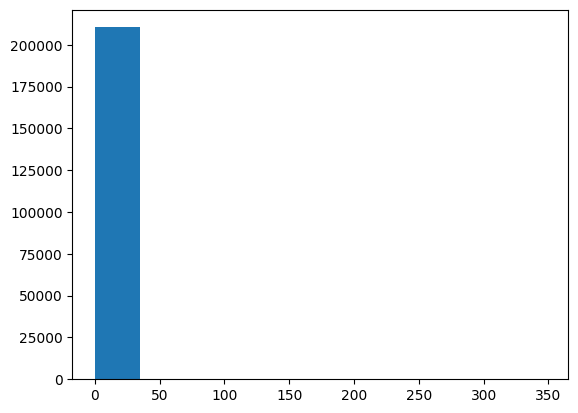

In [31]:
plt.hist(df_app_filter.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

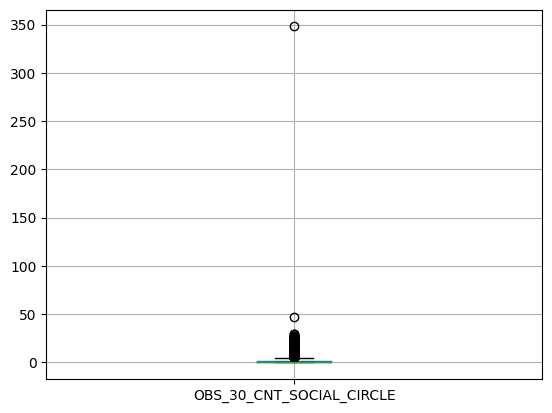

In [32]:
df_app_filter.boxplot("OBS_30_CNT_SOCIAL_CIRCLE")
plt.show()    # outlier is present but we'll not remove it

In [33]:
df_app_filter.OBS_30_CNT_SOCIAL_CIRCLE.mean()

1.4214585788693306

We will replace null values with mean().

3. Suggestion of imputation on DEF_30_CNT_SOCIAL_CIRCLE

In [34]:
df_app_filter["DEF_30_CNT_SOCIAL_CIRCLE"].describe()

count    210424.000000
mean          0.140512
std           0.444591
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

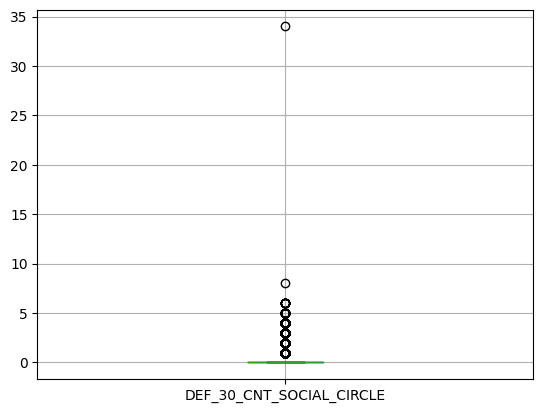

In [35]:
df_app_filter.boxplot("DEF_30_CNT_SOCIAL_CIRCLE")
plt.show()
#Outlier is present but as per the problem statement, we do not need to remove it

In [36]:
df_app_filter.DEF_30_CNT_SOCIAL_CIRCLE.mean()

0.1405115386077634

We will replace null values with mean().

4. Suggestion of imputation on AMT_REQ_CREDIT_BUREAU_HOUR

In [37]:
df_app_filter.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    182823.000000
mean          0.006438
std           0.084177
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

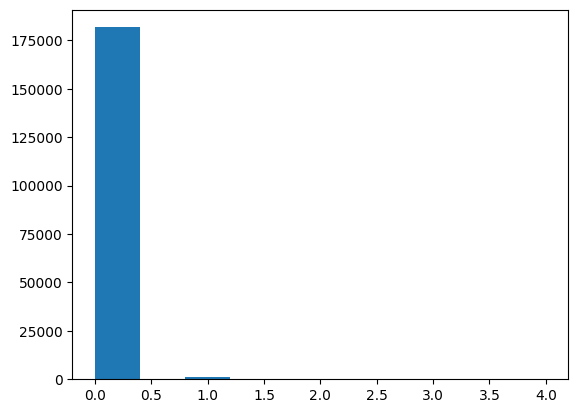

In [38]:
plt.hist(df_app_filter["AMT_REQ_CREDIT_BUREAU_HOUR"])
plt.show()

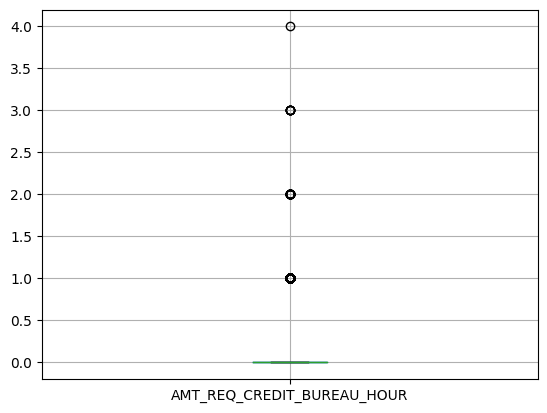

In [39]:
df_app_filter.boxplot("AMT_REQ_CREDIT_BUREAU_HOUR")
plt.show()

In [40]:
df_app_filter.AMT_REQ_CREDIT_BUREAU_HOUR.mean()

0.006437920830530076

We will replace null values with mean().

5. Suggestion of imputation on AMT_REQ_CREDIT_BUREAU_MON

In [41]:
df_app_filter.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    182823.000000
mean          0.279855
std           0.937973
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

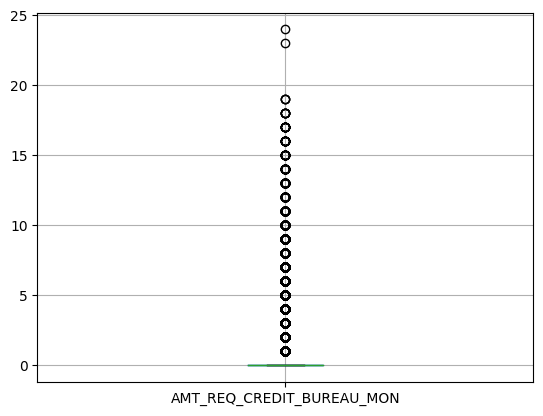

In [44]:
df_app_filter.boxplot("AMT_REQ_CREDIT_BUREAU_MON")
plt.show()

We will replace null values with mean().

### Data Analysis

In [45]:
#Some columns have negative values which do not make sense as per their context,
#therfore converting their values to absolute values:

df_app_filter["DAYS_BIRTH"] = abs(df_app_filter["DAYS_BIRTH"])
df_app_filter["DAYS_ID_PUBLISH"] = abs(df_app_filter["DAYS_ID_PUBLISH"])

In [46]:
df_app_filter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,291,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,2437,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038,-4311.0,3458,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Binning

AMT_INCOME_TOTAL

In [47]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df_app_filter["AMT_INCOME_RANGE"] = pd.cut(df_app_filter["AMT_INCOME_TOTAL"], bins=bins, labels=slot)

In [48]:
df_app_filter["AMT_INCOME_RANGE"].head()

0    200000-225000
1    250000-275000
2      50000-75000
3    125000-150000
4    100000-125000
Name: AMT_INCOME_RANGE, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' < ... <
                          '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

AMT_CREDIT

In [49]:
#Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df_app_filter["AMT_CREDIT_RANGE"] = pd.cut(df_app_filter["AMT_CREDIT"], bins=bins)

In [50]:
df_app_filter["AMT_CREDIT_RANGE"].head()

0        (400000, 450000]
1    (900000, 1000000000]
2             (0, 150000]
3        (300000, 350000]
4        (500000, 550000]
Name: AMT_CREDIT_RANGE, dtype: category
Categories (17, interval[int64, right]): [(0, 150000] < (150000, 200000] < (200000, 250000] <
                                          (250000, 300000] ... (750000, 800000] < (800000, 850000] <
                                          (850000, 900000] < (900000, 1000000000]]

In [52]:
df_app_filter["TARGET"].value_counts()

0    192573
1     18547
Name: TARGET, dtype: int64

In [53]:
# Dividing the dataset into two dataset of  target=1(Defaulters) and target=0(Non-Defaulters)

target0 = df_app_filter.loc[df_app_filter["TARGET"]==0]
target1 = df_app_filter.loc[df_app_filter["TARGET"]==1]

In [54]:
print(target0.shape)
print(target1.shape)

(192573, 44)
(18547, 44)


Calculating Imbalance percentage

In [55]:
# Since the majority is target0 and minority is target1

round(len(target0)/len(target1), 2)

10.38

The Imbalance Ratio is 10.38

In [56]:
total = len(df_app_filter["TARGET"])
explode = [0, 0.05]

In [57]:
def fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

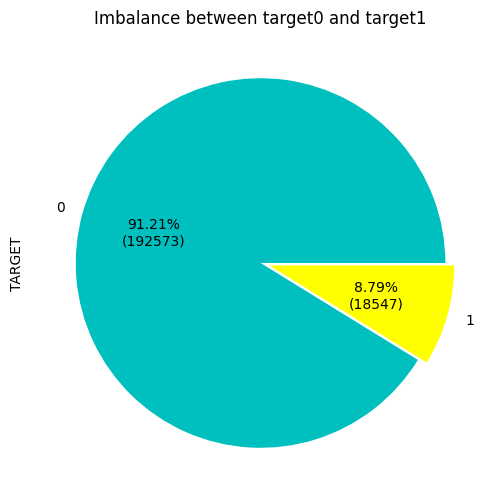

In [58]:
plt.figure(figsize = [6, 6])
plt.title("Imbalance between target0 and target1")
df_app_filter["TARGET"].value_counts().plot.pie(autopct = fmt, colors = ["c", "yellow"], explode = explode)

plt.show()

Conclusion: Here it means 91.21% are non-defaulters and 8.79% are defulters

**Univariate analysis for categories**

In [59]:
# let's find these categorical columns having these 'XNA' values
# For Gender column

df_app_filter[df_app_filter['CODE_GENDER']=='XNA'].shape

(2, 44)

In [60]:
# For Organization column
df_app_filter[df_app_filter['ORGANIZATION_TYPE']=='XNA'].shape

(2, 44)

In [61]:
# Describing the Gender column to check the number of females and males
df_app_filter['CODE_GENDER'].value_counts()

F      129282
M       81836
XNA         2
Name: CODE_GENDER, dtype: int64

In [62]:
# Updating the column 'CODE_GENDER' with "F" for the dataset
df_app_filter.loc[df_app_filter['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df_app_filter['CODE_GENDER'].value_counts()

F    129284
M     81836
Name: CODE_GENDER, dtype: int64

Doing Categorical Univariate Analysis in logarithmic scale for target=0(Non-defaulters)

In [63]:
def uniplot(df_app_filter,col,title,hue = None):
  sns.set_style('darkgrid')
  sns.set_context('notebook')
  plt.rcParams["axes.labelsize"] = 25
  plt.rcParams["axes.titlesize"] = 27
  plt.rcParams["axes.titlepad"] = 30

  temp = pd.Series(data = hue)
  fig, ax = plt.subplots()
  width = len(df_app_filter[col].unique()) + 7 + 4*len(temp.unique())
  fig.set_size_inches(width , 8)
  plt.xticks(rotation=45)
  plt.yscale('log')
  plt.title(title)
  ax = sns.countplot(data = df_app_filter, x= col, order=df_app_filter[col].value_counts().index,hue = hue,palette='magma')

  plt.show()

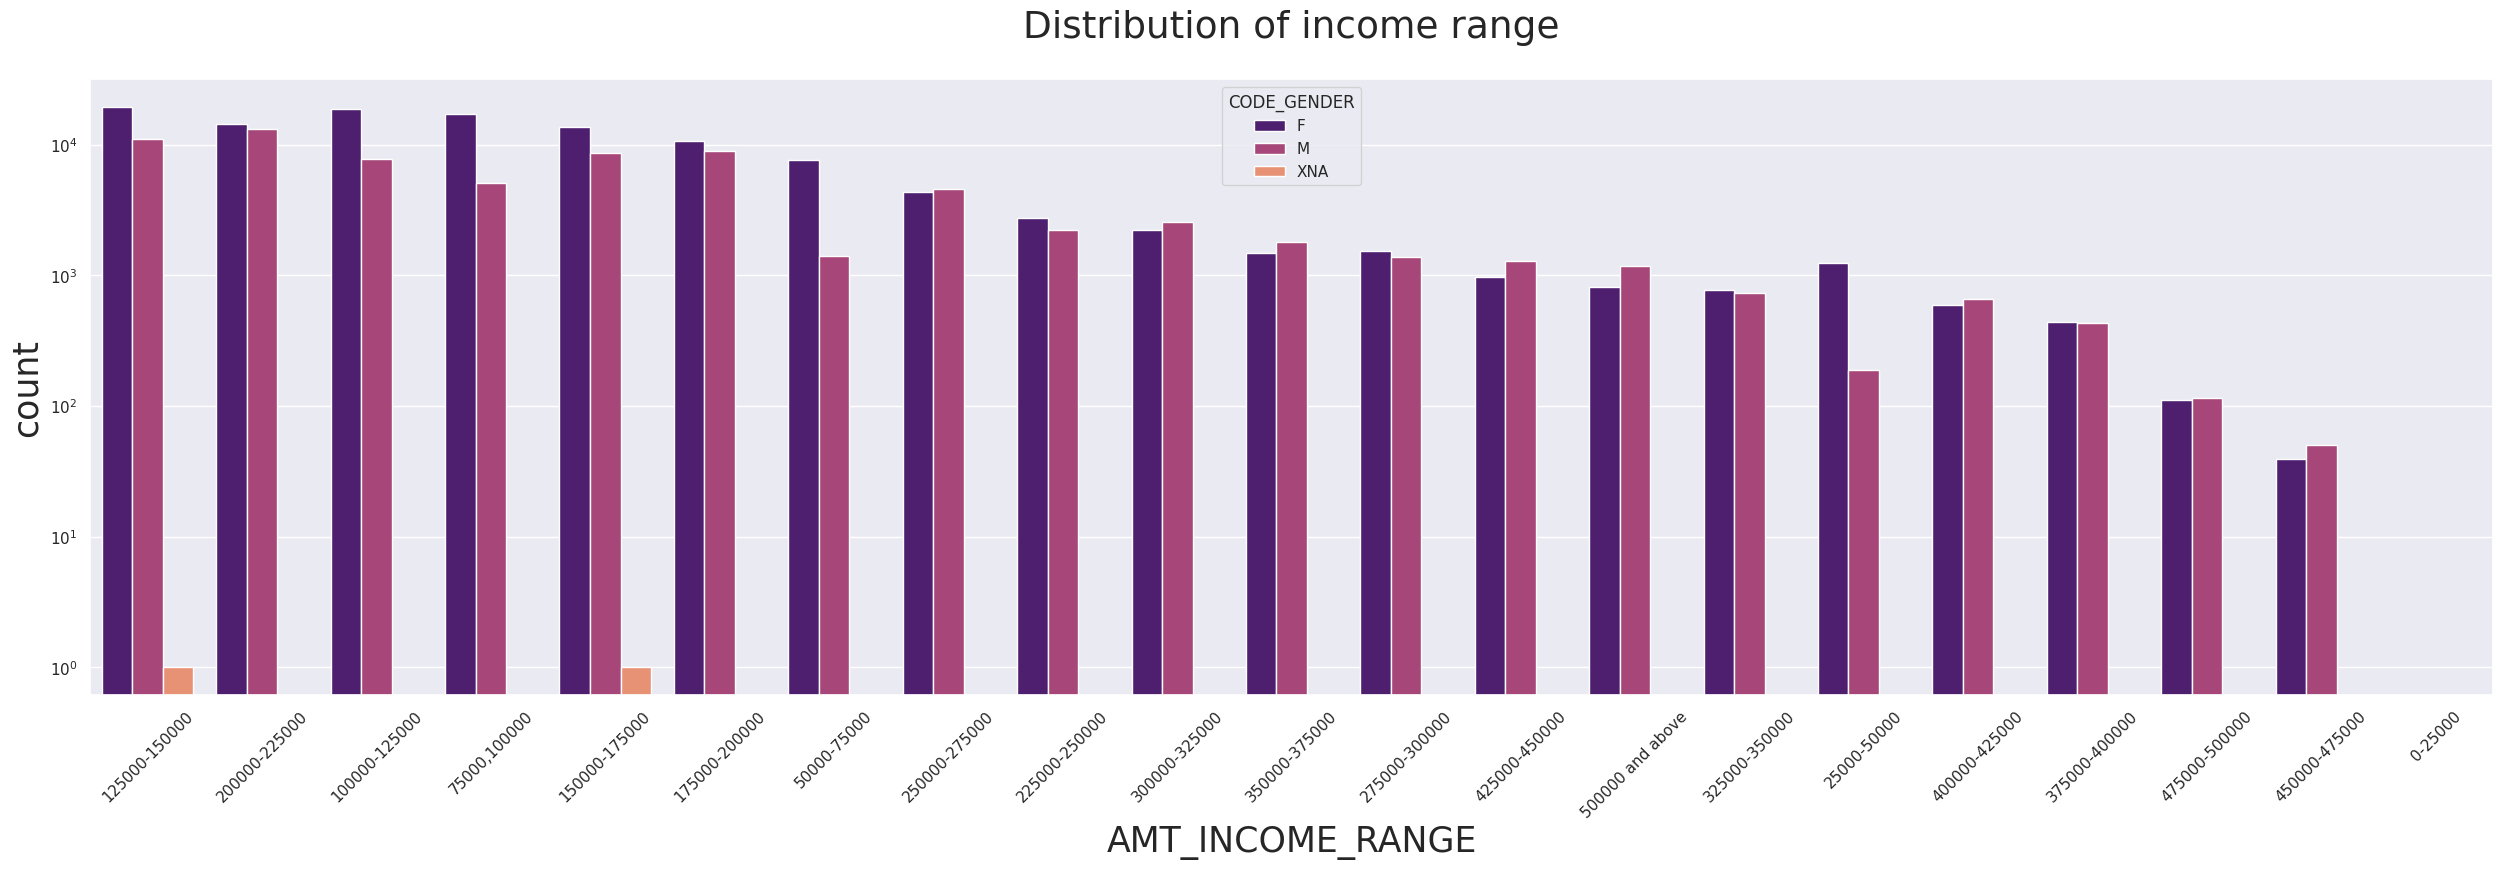

In [64]:
# Plotting for income range
uniplot(target0,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Conclusion:

1. Female counts are higher than male.
2. Income range from 200000 to 225000 is having more number of credits.
3. This graph show that females are more than male in having credits for that range.
4. Very less count for income range 400000 and above.

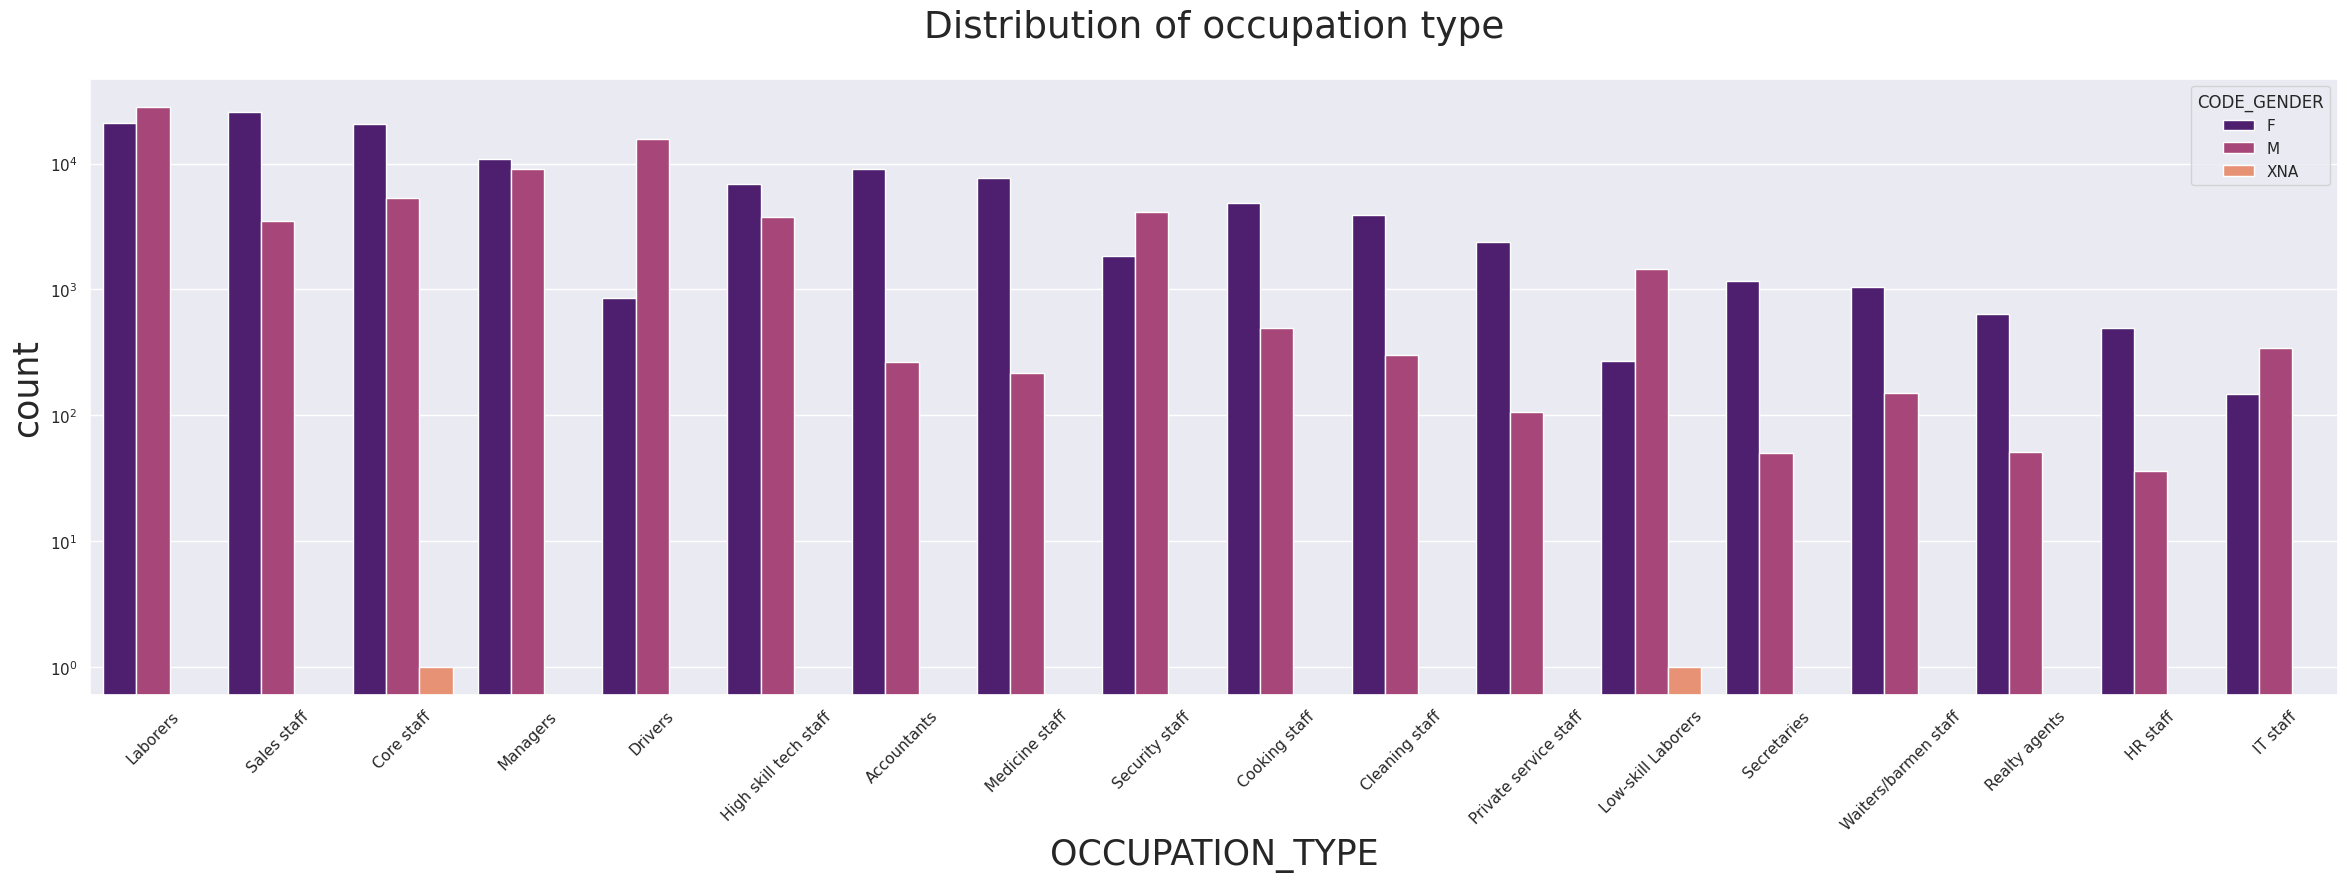

In [65]:
# Plotting for occupation type
uniplot(target0,col='OCCUPATION_TYPE',title='Distribution of occupation type',hue='CODE_GENDER')

Conclusion:

1. Female counts are higher than male.
2. Laborers having more number of credits.
3. This graph show that females are more than male in having credits for that range.
4. In IT Staff females have very less number of credits.
5. In Medicine Staff Secretaries males have very less number of credits.
6. In Realty agents males don't have credits.

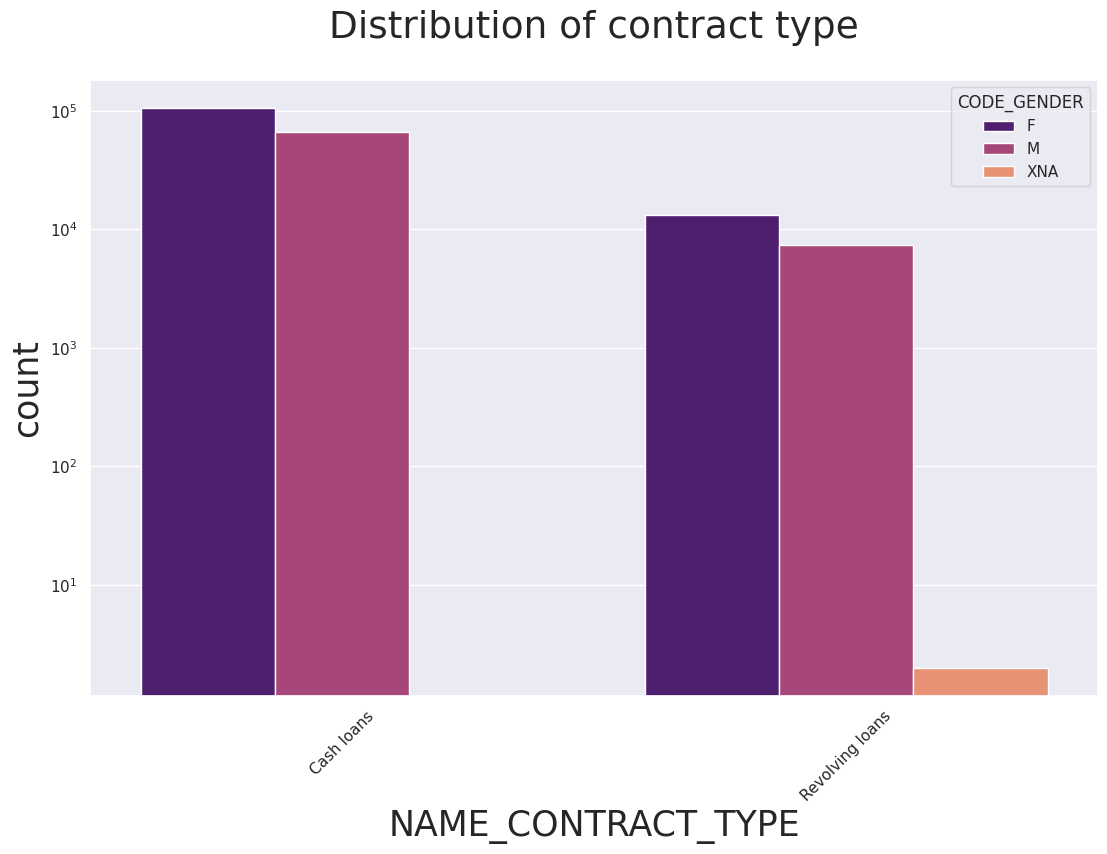

In [66]:
# Plotting for Contract type
uniplot(target0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Conclusion:

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female are applying for more credits.

Doing Categorical Univariate Analysis in logarithmic scale for target=1(defaulters)

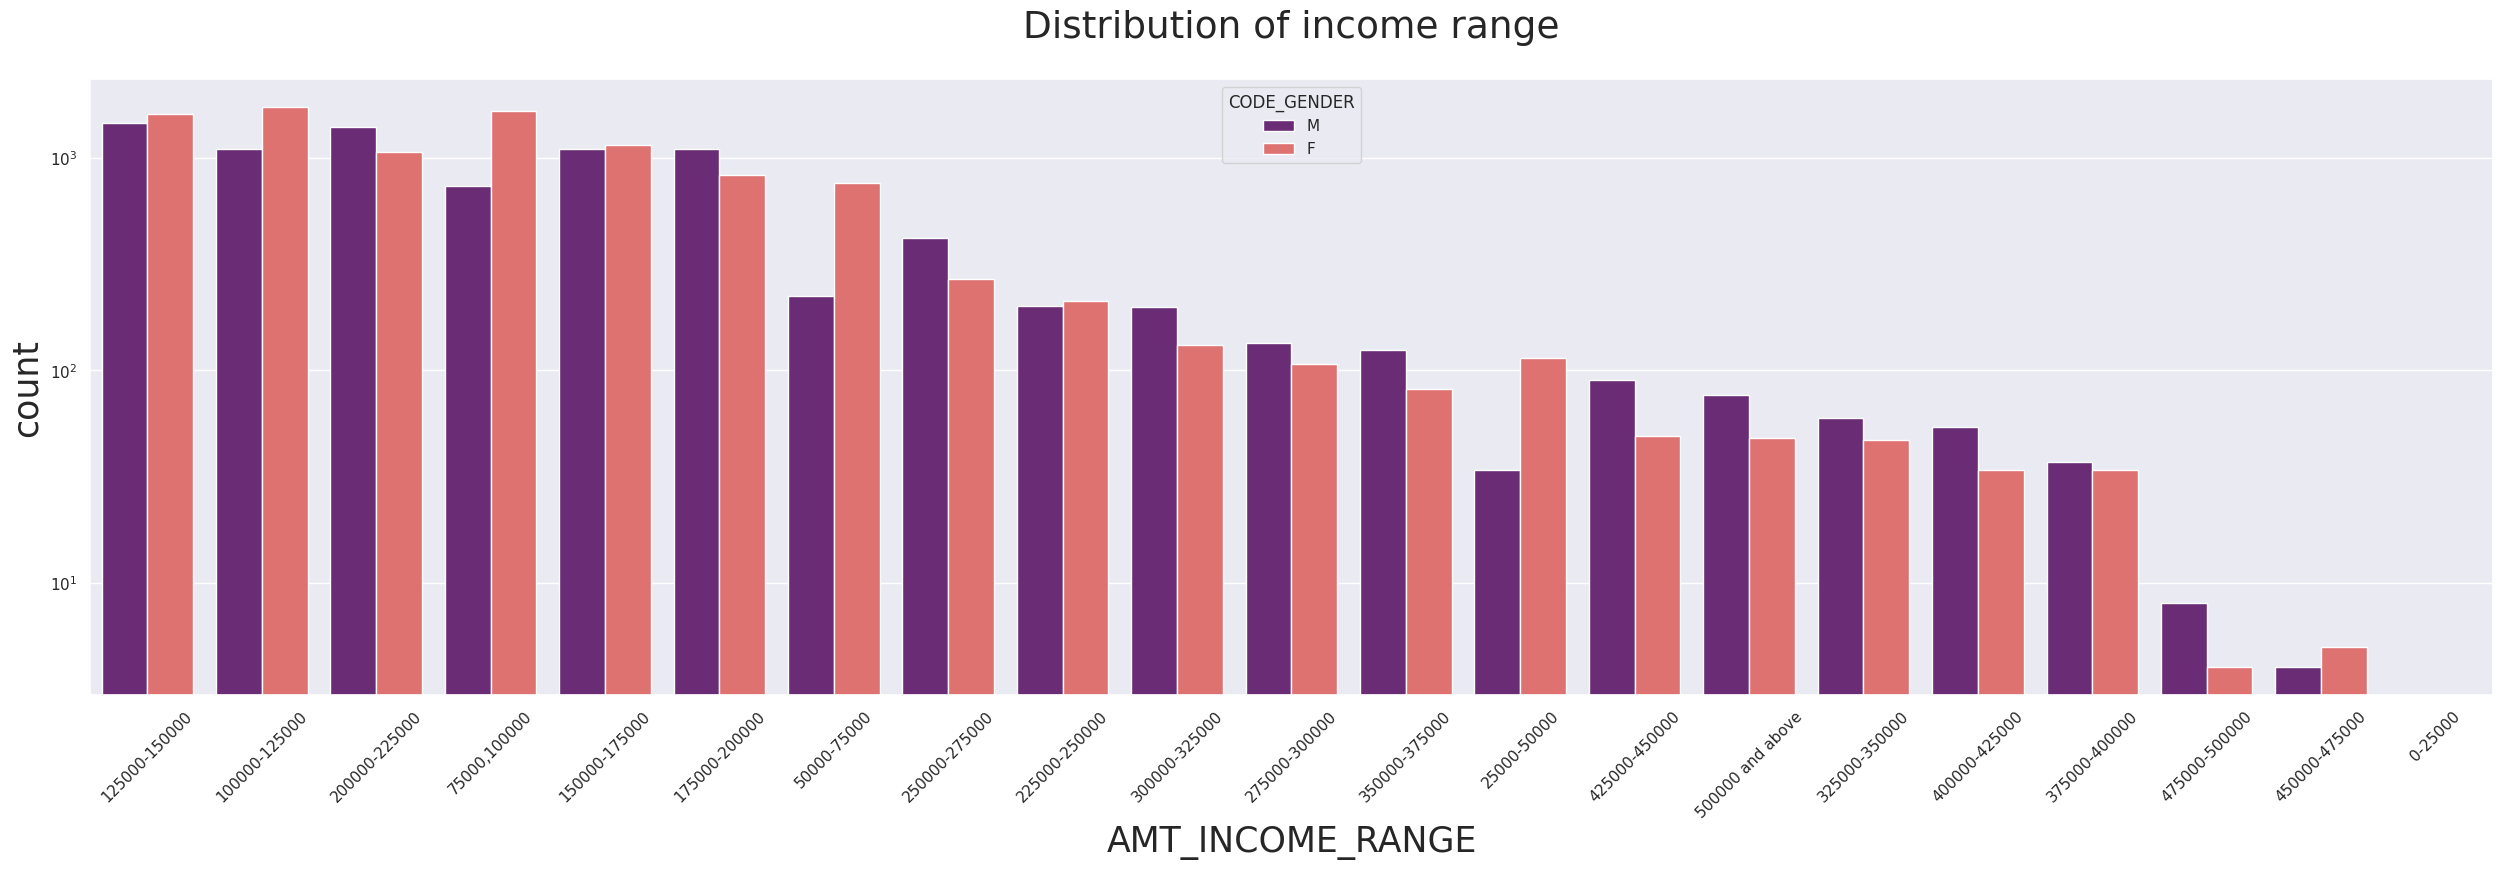

In [67]:
# Plotting for income range
uniplot(target1,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Conclusion:

1. Male counts are higher than female in making defaults.
2. Income range from 125000 to 150000 have more number of defaults.
3. This graph show that males are more than female in having defaults for that range.
4. Very less count for income range 400000 and above.

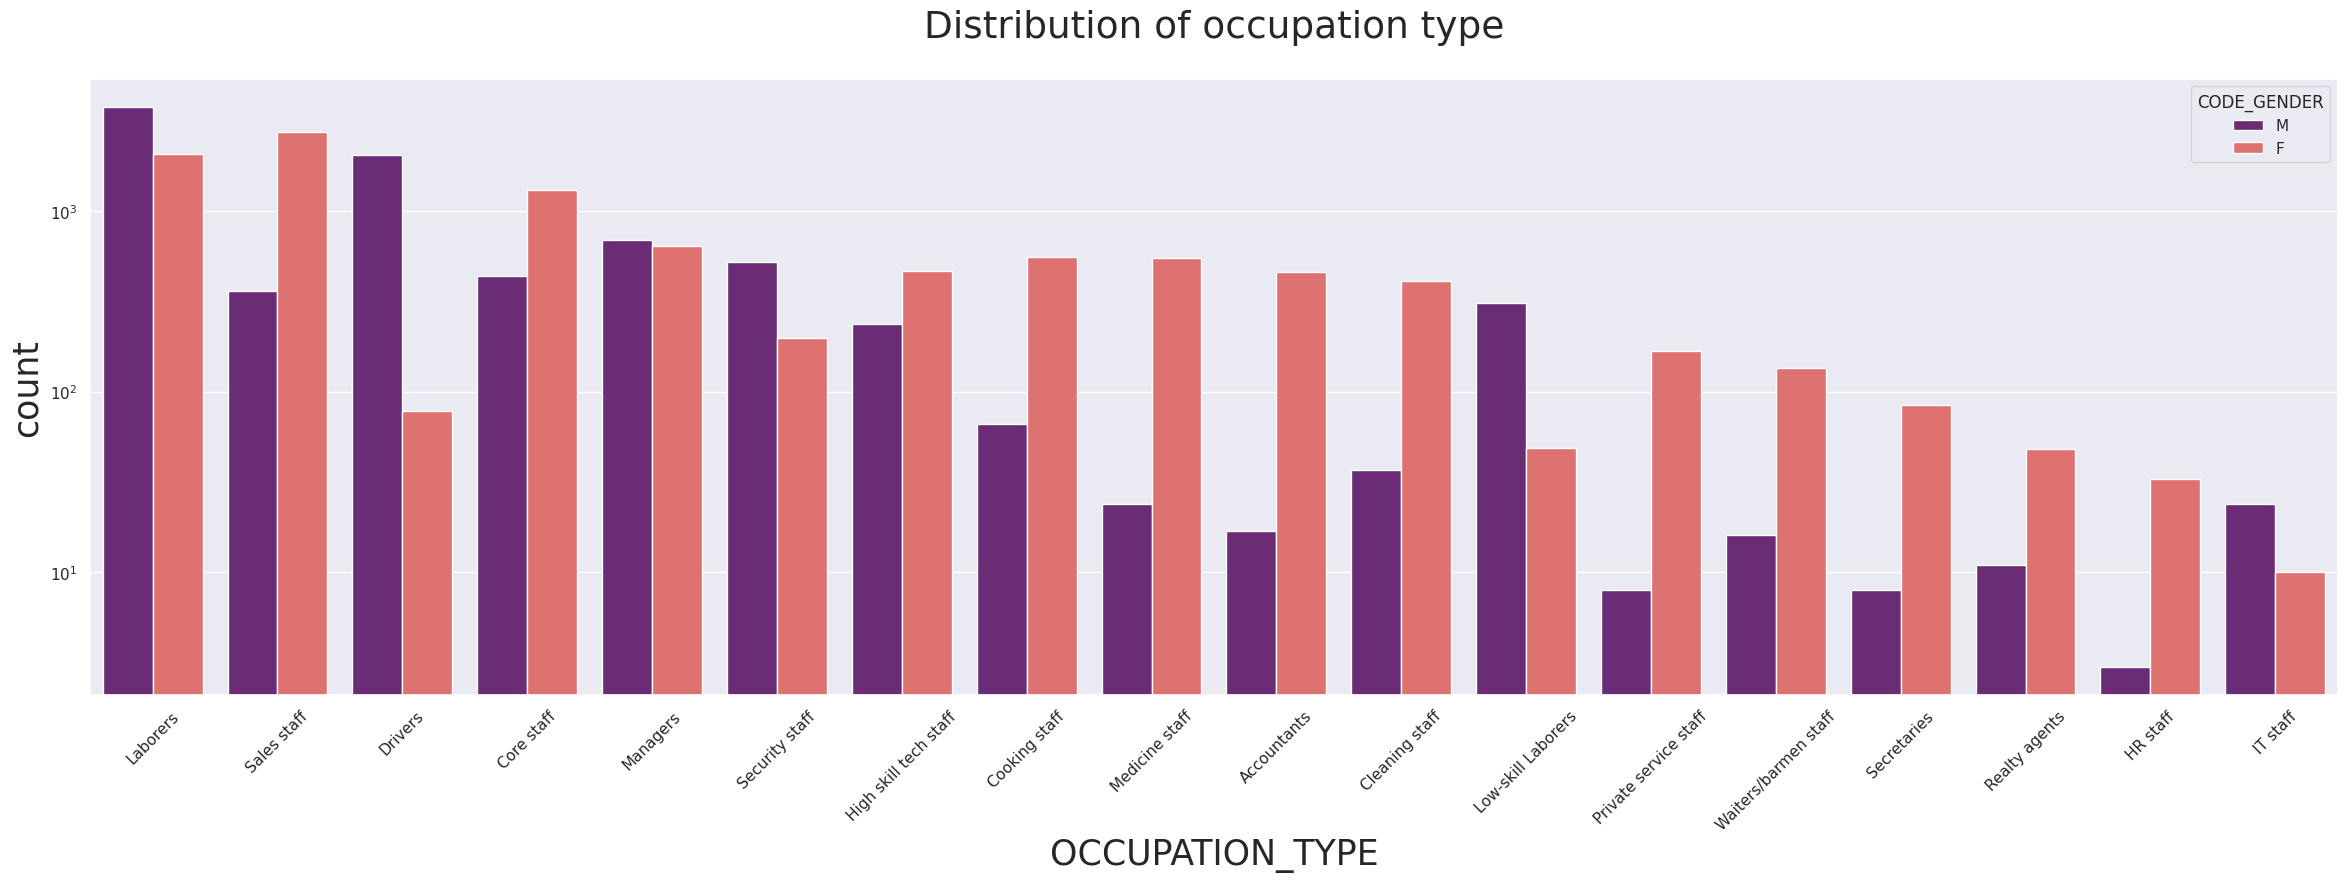

In [68]:
# Plotting for occupation type
uniplot(target1,col='OCCUPATION_TYPE',title='Distribution of occupation type',hue='CODE_GENDER')

Conclusion:

1. Male counts are higher than female.
2. Laborers having more number of defaults.


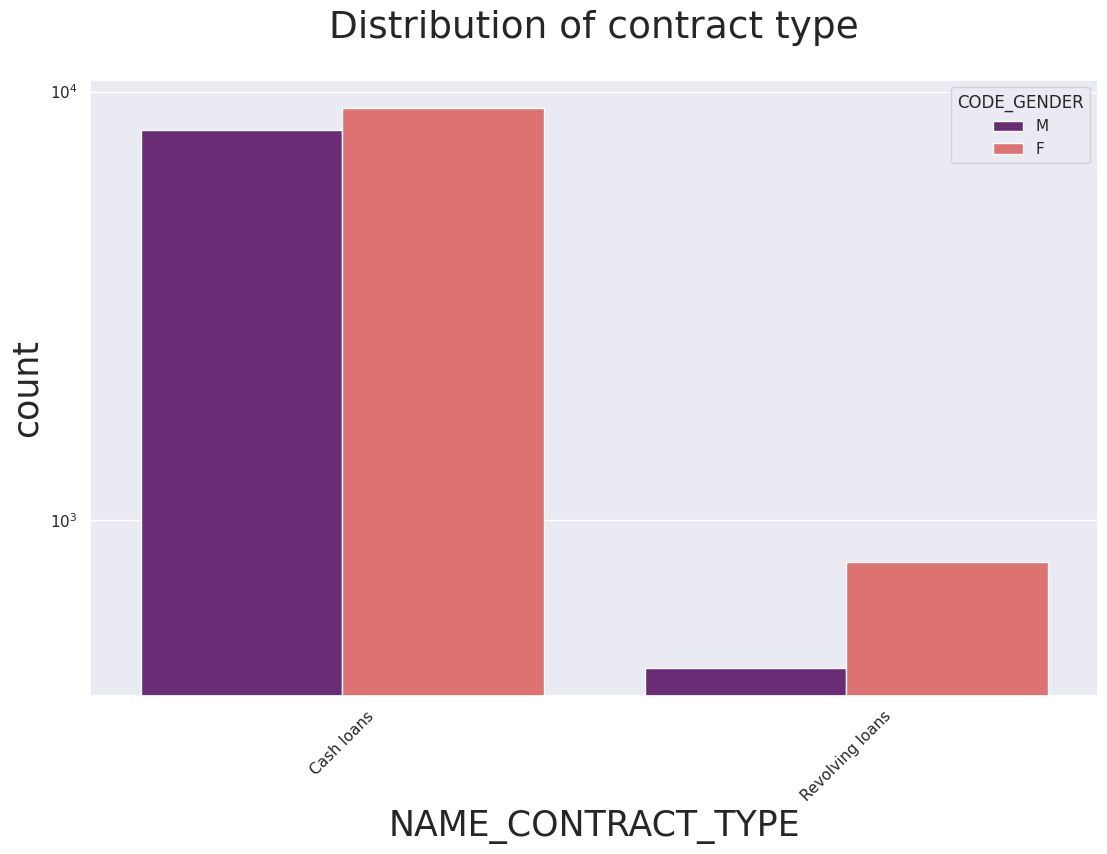

In [69]:
# Plotting for Contract type
uniplot(target1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Conclusion:

1. For contract type ‘cash loans’ is having higher number of defaults than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. There is higher Female Revolving loans.

In [70]:
# Finding some correlation for numerical columns for both target 0 and 1

target0_corr = target0.iloc[0:,2:]
target1_corr = target1.iloc[0:,2:]

target_0=target0_corr.corr(method='spearman')
target_1=target1_corr.corr(method='spearman')

In [71]:
# Correlation for target 0
target_0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.024847,-0.024332,-0.011700,-0.027868,-0.030012,-0.268836,0.030510,0.156244,0.120376,0.850743,-0.028778,-0.024466,-0.015475,-0.005085,0.003539,0.005906,0.010501,0.026458,0.003252,0.026141,0.002182,-0.001598,-0.000559,-0.000588,-0.014038,-0.001621,-0.036013
AMT_INCOME_TOTAL,-0.024847,1.000000,0.403603,0.472368,0.408292,0.103528,0.064891,-0.066437,0.037533,0.037887,-0.011943,0.071108,0.074806,0.154111,0.142971,-0.002090,-0.013913,-0.003822,-0.034664,-0.034280,-0.034401,-0.034949,0.002120,0.007412,0.009783,0.069568,0.027961,0.055325
AMT_CREDIT,-0.024332,0.403603,1.000000,0.826447,0.985014,0.057471,0.173663,-0.107248,-0.018331,0.038427,0.045227,0.035377,0.014300,0.039907,0.043005,-0.041621,-0.037260,-0.011340,-0.002476,-0.019109,-0.002339,-0.021515,-0.002546,0.000066,-0.006139,0.042316,0.028550,-0.036029
AMT_ANNUITY,-0.011700,0.472368,0.826447,1.000000,0.823975,0.059343,0.107457,-0.078971,0.007882,0.028269,0.052744,0.030412,0.031944,0.068026,0.066180,-0.021973,-0.023813,-0.006919,-0.014537,-0.020010,-0.014288,-0.022695,0.005206,0.002750,0.012647,0.046689,0.028686,0.005954
AMT_GOODS_PRICE,-0.027868,0.408292,0.985014,0.823975,1.000000,0.066818,0.173814,-0.112707,-0.018053,0.040018,0.044894,0.043343,0.015780,0.040842,0.043384,-0.043332,-0.040086,-0.013490,-0.003245,-0.020229,-0.003065,-0.022034,-0.002214,0.000050,-0.005071,0.043653,0.029501,-0.038565
REGION_POPULATION_RELATIVE,-0.030012,0.103528,0.057471,0.059343,0.066818,1.000000,0.044357,-0.000261,-0.044437,0.011358,-0.021277,0.127998,-0.025421,0.027858,0.051005,-0.048461,-0.031217,-0.004798,0.011386,0.030972,0.011874,0.025664,-0.003979,-0.000082,-0.004572,0.053104,-0.004580,0.002941
DAYS_BIRTH,-0.268836,0.064891,0.173663,0.107457,0.173814,0.044357,1.000000,-0.302100,-0.264431,0.077231,-0.173856,-0.049098,-0.057373,-0.035802,-0.010415,-0.168542,-0.111251,-0.028207,-0.033093,-0.020515,-0.032708,-0.020866,-0.000978,-0.004341,0.000413,0.016936,-0.002593,0.045827
DAYS_EMPLOYED,0.030510,-0.066437,-0.107248,-0.078971,-0.112707,-0.000261,-0.302100,1.000000,0.124430,-0.104878,-0.016050,0.022569,0.065149,0.087115,0.063485,0.117804,0.128325,0.072552,0.000054,0.008043,0.000084,0.008802,-0.003475,0.000270,-0.001411,-0.026153,0.001834,-0.019168
DAYS_REGISTRATION,0.156244,0.037533,-0.018331,0.007882,-0.018053,-0.044437,-0.264431,0.124430,1.000000,-0.035964,0.144263,-0.031398,0.017140,0.014259,0.007019,0.037238,0.045255,0.025584,0.020319,0.009055,0.020050,0.008423,-0.003424,0.001681,-0.001119,-0.014171,0.003039,-0.016696
DAYS_ID_PUBLISH,0.120376,0.037887,0.038427,0.028269,0.040018,0.011358,0.077231,-0.104878,-0.035964,1.000000,0.109505,-0.007430,-0.027730,-0.019910,-0.006894,-0.053714,-0.032674,-0.001212,0.003521,-0.010498,0.004132,-0.012987,-0.005990,0.001593,0.004426,0.022402,0.004733,0.024275


In [72]:
# Correlation for target 1
target_1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.034500,0.000410,0.017066,-0.005009,-0.025222,-0.177275,0.006325,0.114295,0.091765,0.848030,-0.036064,-0.035912,-0.042859,-0.028902,-0.018877,-0.005948,0.011012,0.039193,-0.000757,0.038390,-0.001909,-0.002324,-0.006352,0.004055,-0.022891,-0.013746,-0.030077
AMT_INCOME_TOTAL,-0.034500,1.000000,0.365053,0.429073,0.370213,0.056913,0.110416,-0.058110,0.010316,0.051197,-0.023323,0.072747,0.073016,0.156018,0.144912,-0.007865,-0.007242,0.004340,-0.000837,-0.021911,-0.001217,-0.025665,0.016661,0.000018,0.022750,0.074710,0.016066,0.073255
AMT_CREDIT,0.000410,0.365053,1.000000,0.810931,0.975847,0.041122,0.200278,-0.108461,-0.023722,0.065354,0.057022,0.025689,0.017237,0.035228,0.034583,-0.029037,-0.031575,-0.012134,0.018015,-0.023685,0.018021,-0.029170,0.001743,-0.004666,0.005109,0.043976,-0.015940,-0.029076
AMT_ANNUITY,0.017066,0.429073,0.810931,1.000000,0.805965,0.026174,0.103525,-0.062038,0.020576,0.045660,0.061868,0.019176,0.033610,0.062767,0.058327,-0.009968,-0.014369,-0.003241,0.007554,-0.018979,0.008381,-0.022554,0.012945,-0.002896,0.037761,0.060943,-0.000575,-0.003750
AMT_GOODS_PRICE,-0.005009,0.370213,0.975847,0.805965,1.000000,0.055737,0.197683,-0.115865,-0.023896,0.069582,0.056039,0.038686,0.021075,0.039131,0.037079,-0.028869,-0.032941,-0.012655,0.020058,-0.021526,0.020046,-0.026260,0.005166,-0.005557,0.008229,0.049212,-0.012555,-0.030219
REGION_POPULATION_RELATIVE,-0.025222,0.056913,0.041122,0.026174,0.055737,1.000000,0.045612,-0.013687,-0.031182,0.019377,-0.019018,0.100935,-0.031839,-0.008664,0.011525,-0.060086,-0.047507,-0.018756,0.032605,0.050876,0.032393,0.039562,-0.007173,0.000250,0.003492,0.052354,-0.014398,0.005198
DAYS_BIRTH,-0.177275,0.110416,0.200278,0.103525,0.197683,0.045612,1.000000,-0.252224,-0.188168,0.146392,-0.084238,-0.039373,-0.044455,-0.018405,0.002595,-0.146861,-0.097017,-0.008345,-0.006706,-0.020191,-0.005884,-0.025431,-0.020955,-0.011621,-0.008621,0.019658,-0.003125,0.077884
DAYS_EMPLOYED,0.006325,-0.058110,-0.108461,-0.062038,-0.115865,-0.013687,-0.252224,1.000000,0.085469,-0.104419,-0.044762,0.011581,0.068132,0.081332,0.054094,0.117966,0.141726,0.070697,-0.023880,0.008928,-0.024175,0.010682,0.010132,0.016009,0.007079,-0.015386,0.012061,-0.048423
DAYS_REGISTRATION,0.114295,0.010316,-0.023722,0.020576,-0.023896,-0.031182,-0.188168,0.085469,1.000000,-0.061822,0.111938,-0.043065,0.006420,-0.001539,-0.003894,0.015022,0.035829,0.024558,0.024780,0.013551,0.024185,0.009862,0.001586,0.002302,0.008286,0.007610,-0.005575,-0.014588
DAYS_ID_PUBLISH,0.091765,0.051197,0.065354,0.045660,0.069582,0.019377,0.146392,-0.104419,-0.061822,1.000000,0.087490,-0.012866,-0.023749,-0.013860,-0.002561,-0.050289,-0.015088,0.017991,0.011822,-0.010640,0.011077,-0.008609,-0.001777,0.008728,-0.009523,0.025246,-0.011185,0.044482


In [73]:
# plotting the above correlation with heat map as it is the best choice to visulaize

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 50

# heatmap with a color map of choice


    sns.heatmap(data, cmap="rainbow",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

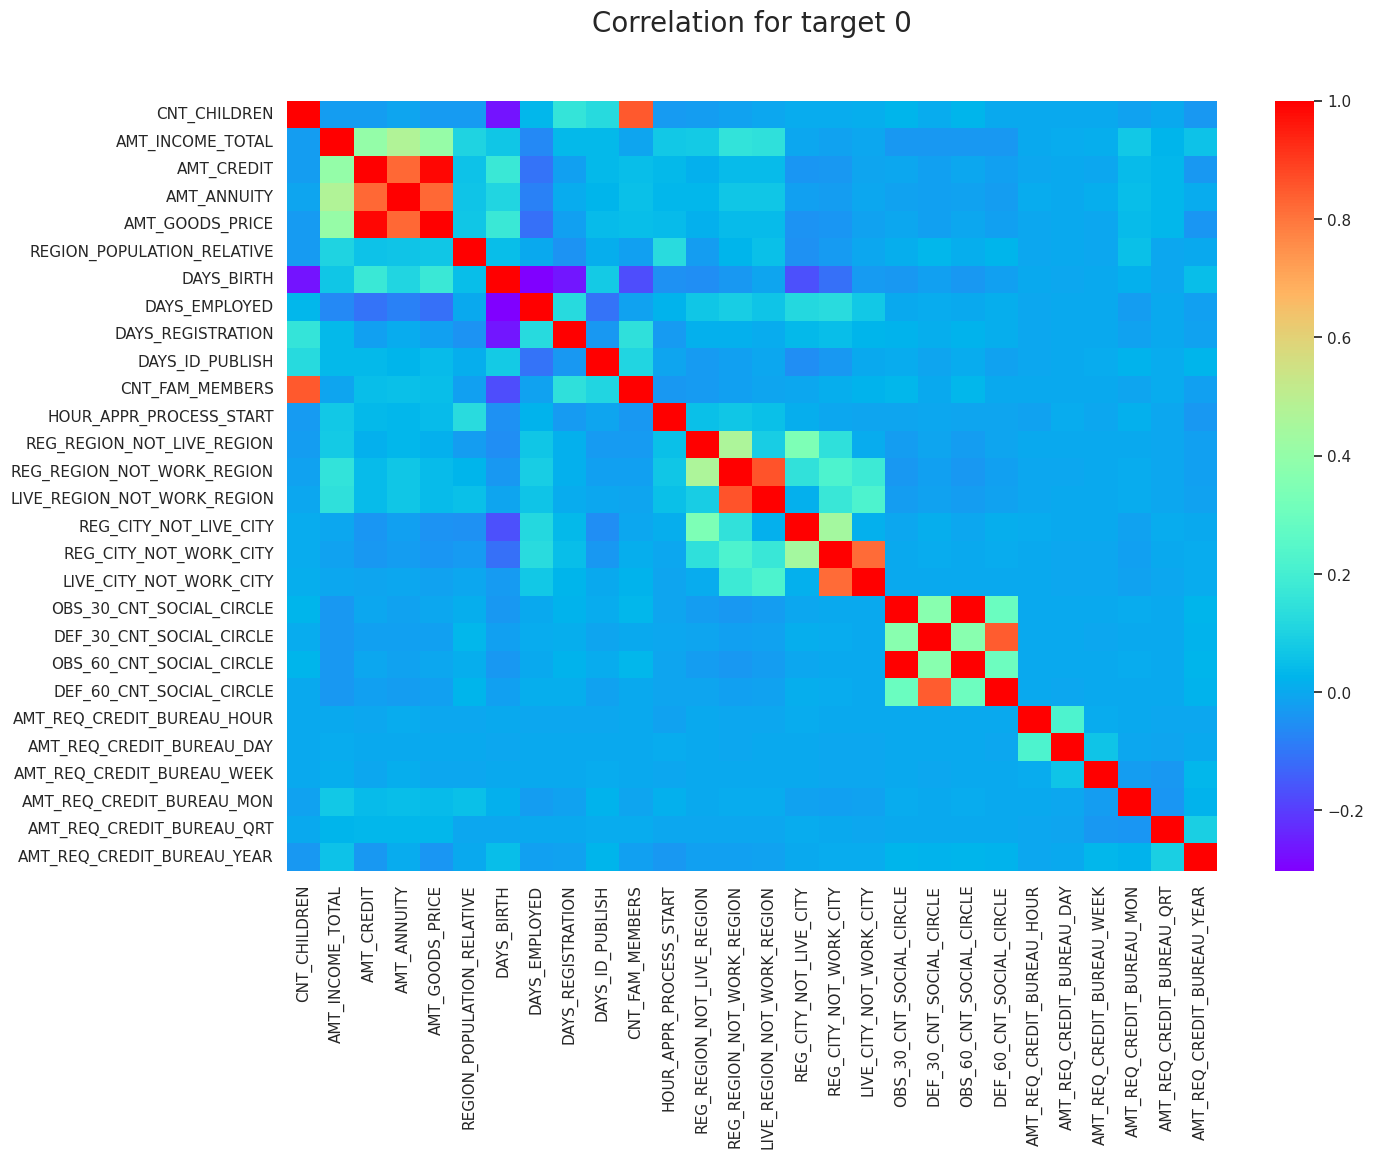

In [74]:
# For Target 0
targets_corr(data=target_0,title='Correlation for target 0')

As we can see from above correlation heatmap, There are number of observation we can point out

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

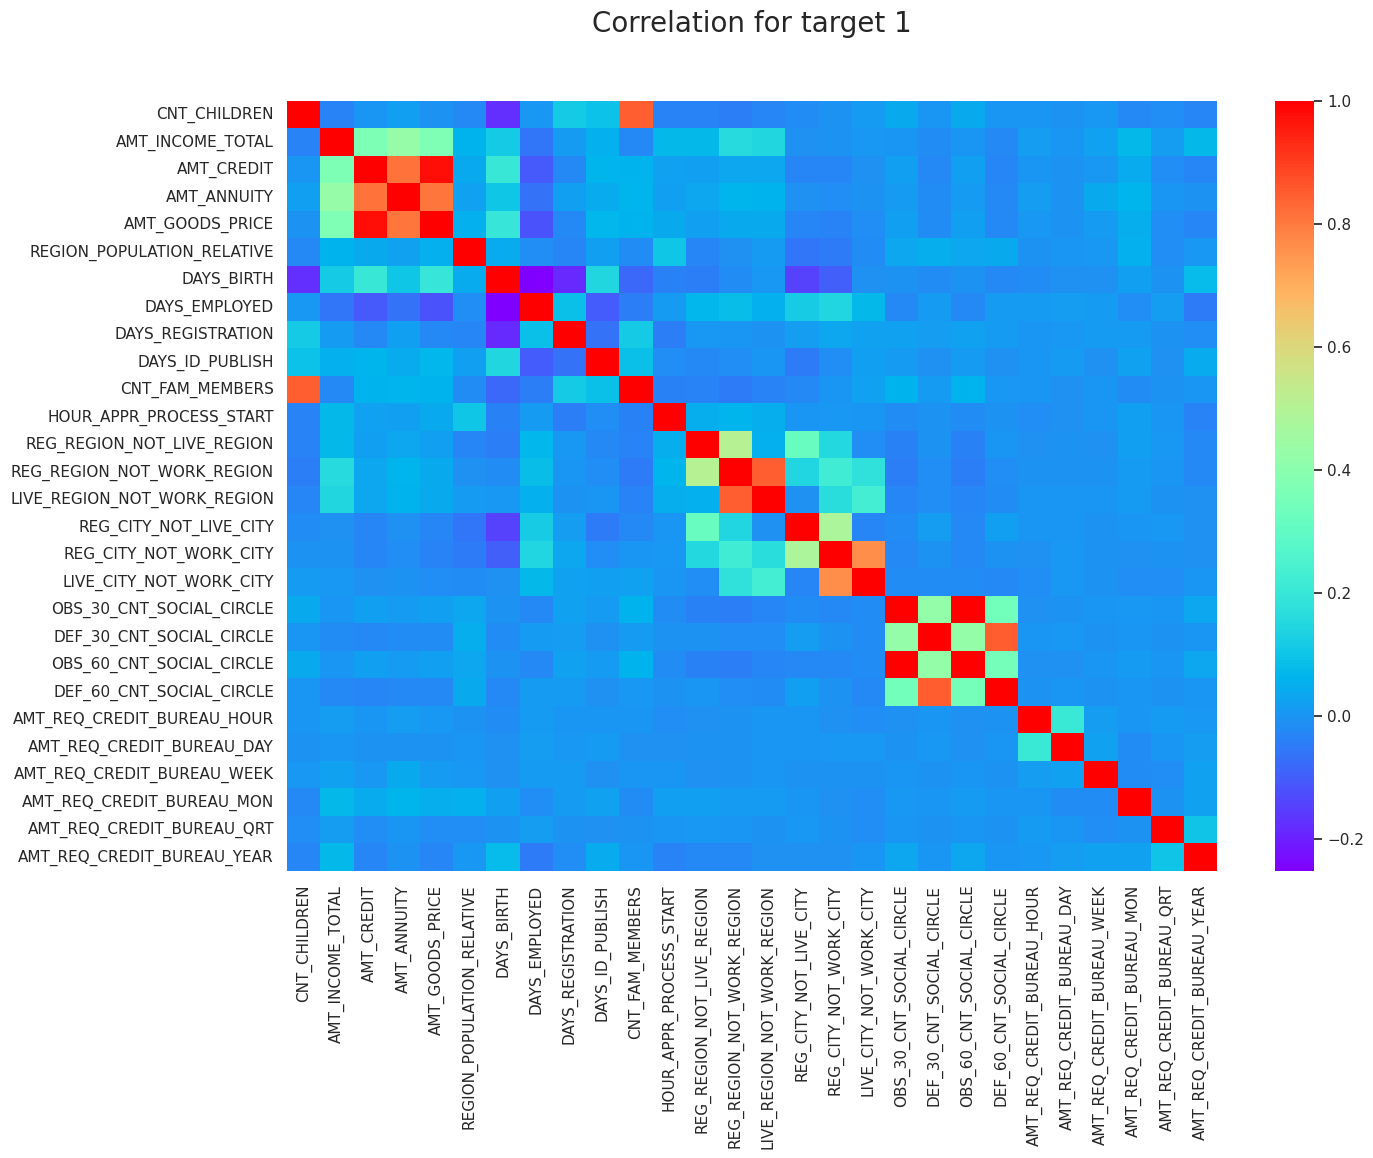

In [75]:
# For Target 1
targets_corr(data=target_1,title='Correlation for target 1')

This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

1. The client's permanent address does not match contact address are having less children and vice-versa
2. the client's permanent address does not match work address are having less children and vice-versa

Univariate analysis for variables

In [76]:
def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    plt.figure(figsize=(16,12))
    plt.title(title)
    plt.xticks(rotation=45)
    sns.boxplot(data =target_1, x=col,orient='v')
    plt.show()

For Target 0 - Finding any outliers

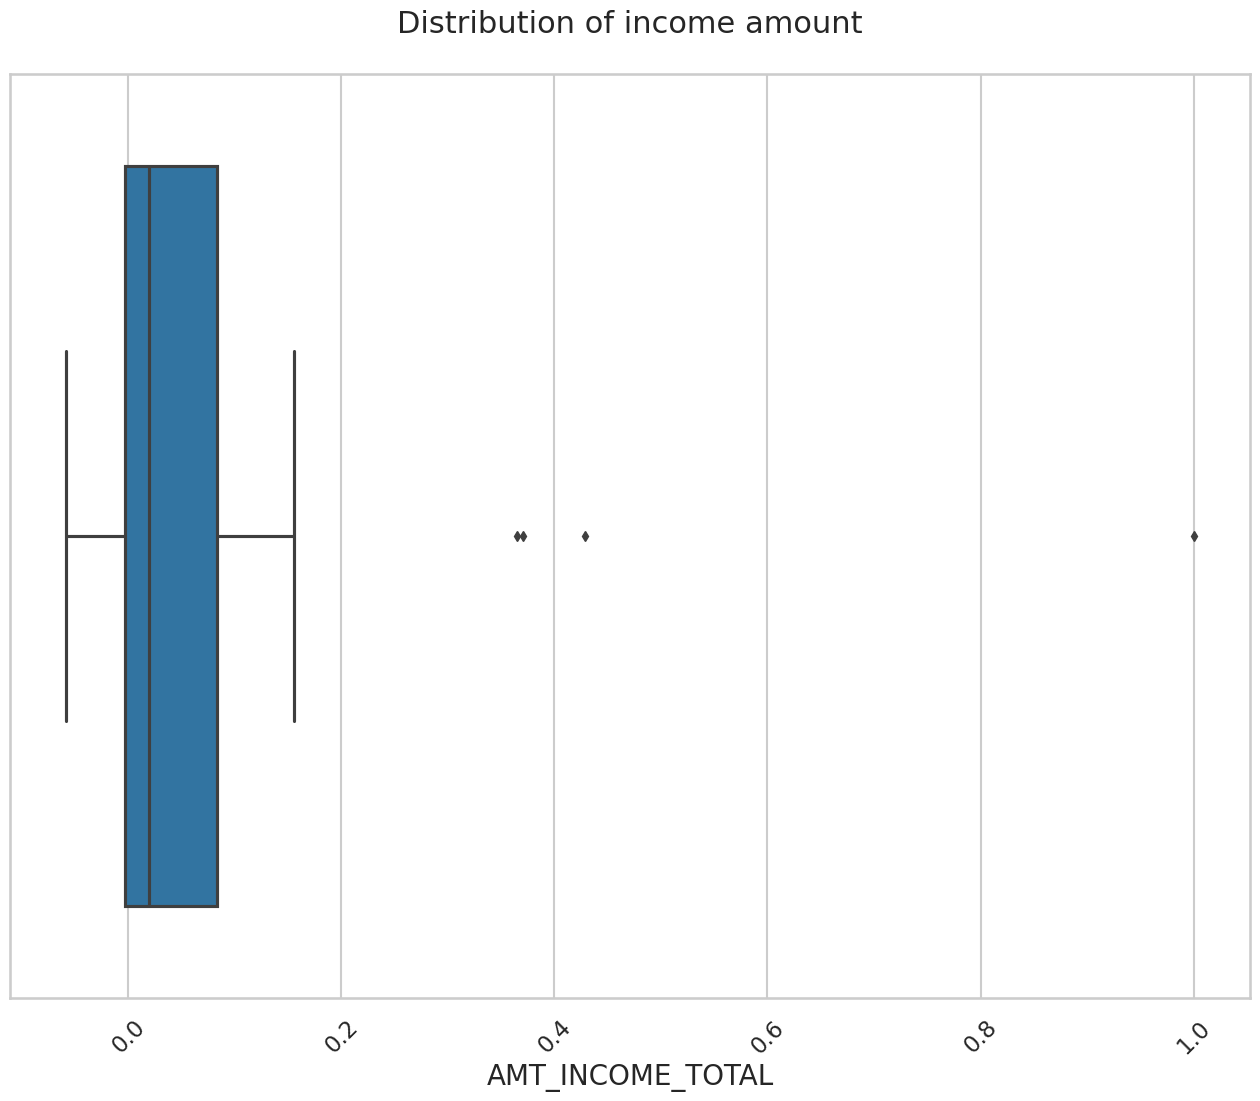

In [77]:
# Distribution of income amount
univariate_numerical(data=target_0,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Conclusion:

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.

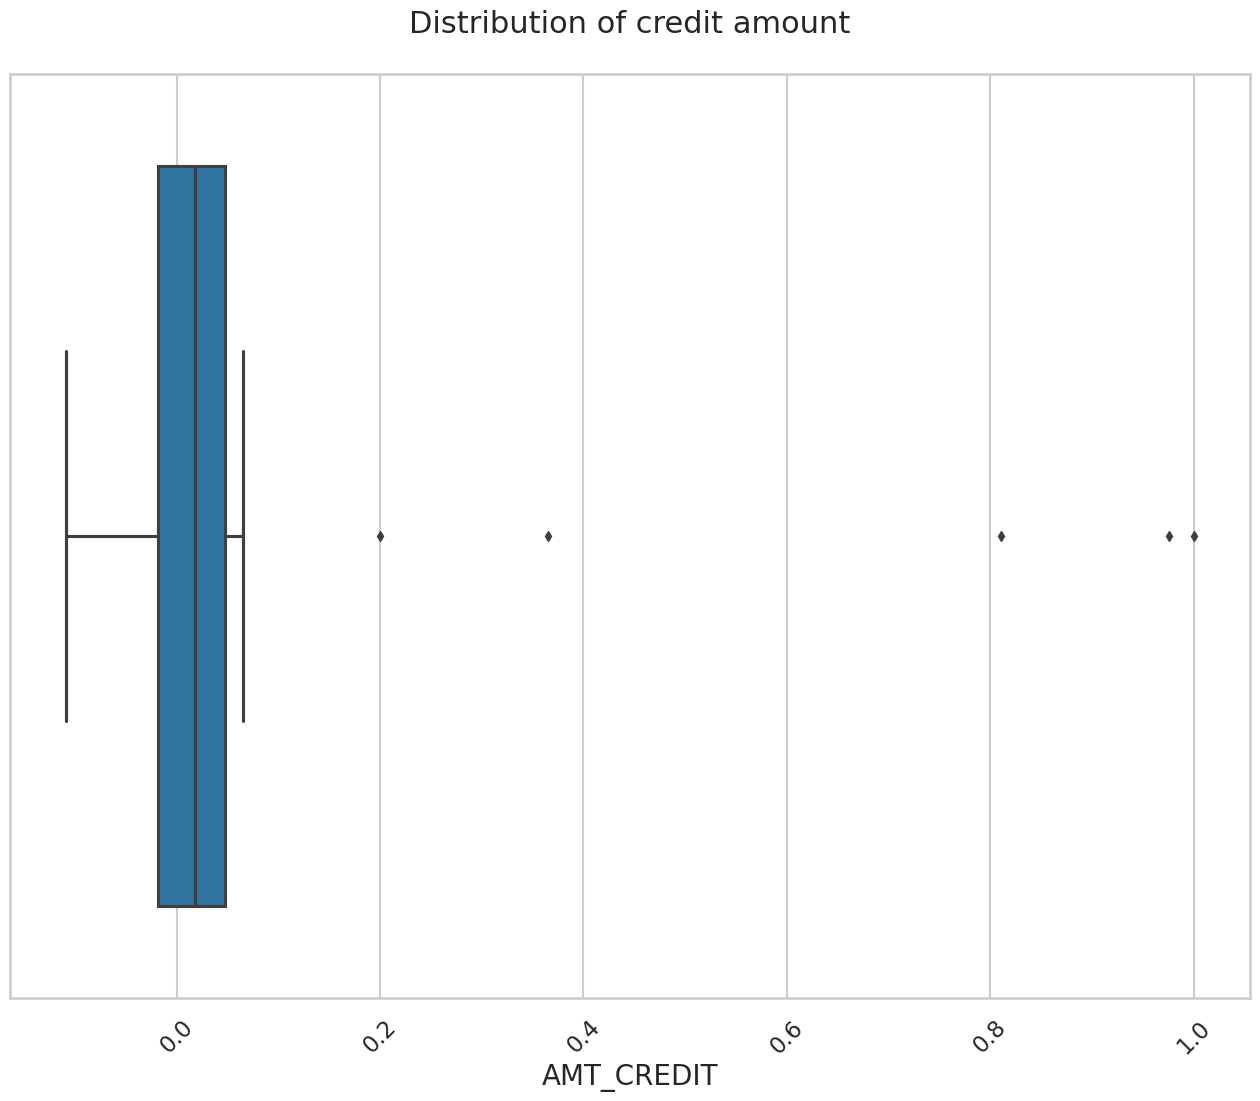

In [78]:
# Disrtibution of credit amount
univariate_numerical(data=target_0,col='AMT_CREDIT',title='Distribution of credit amount')

Conclusion:

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

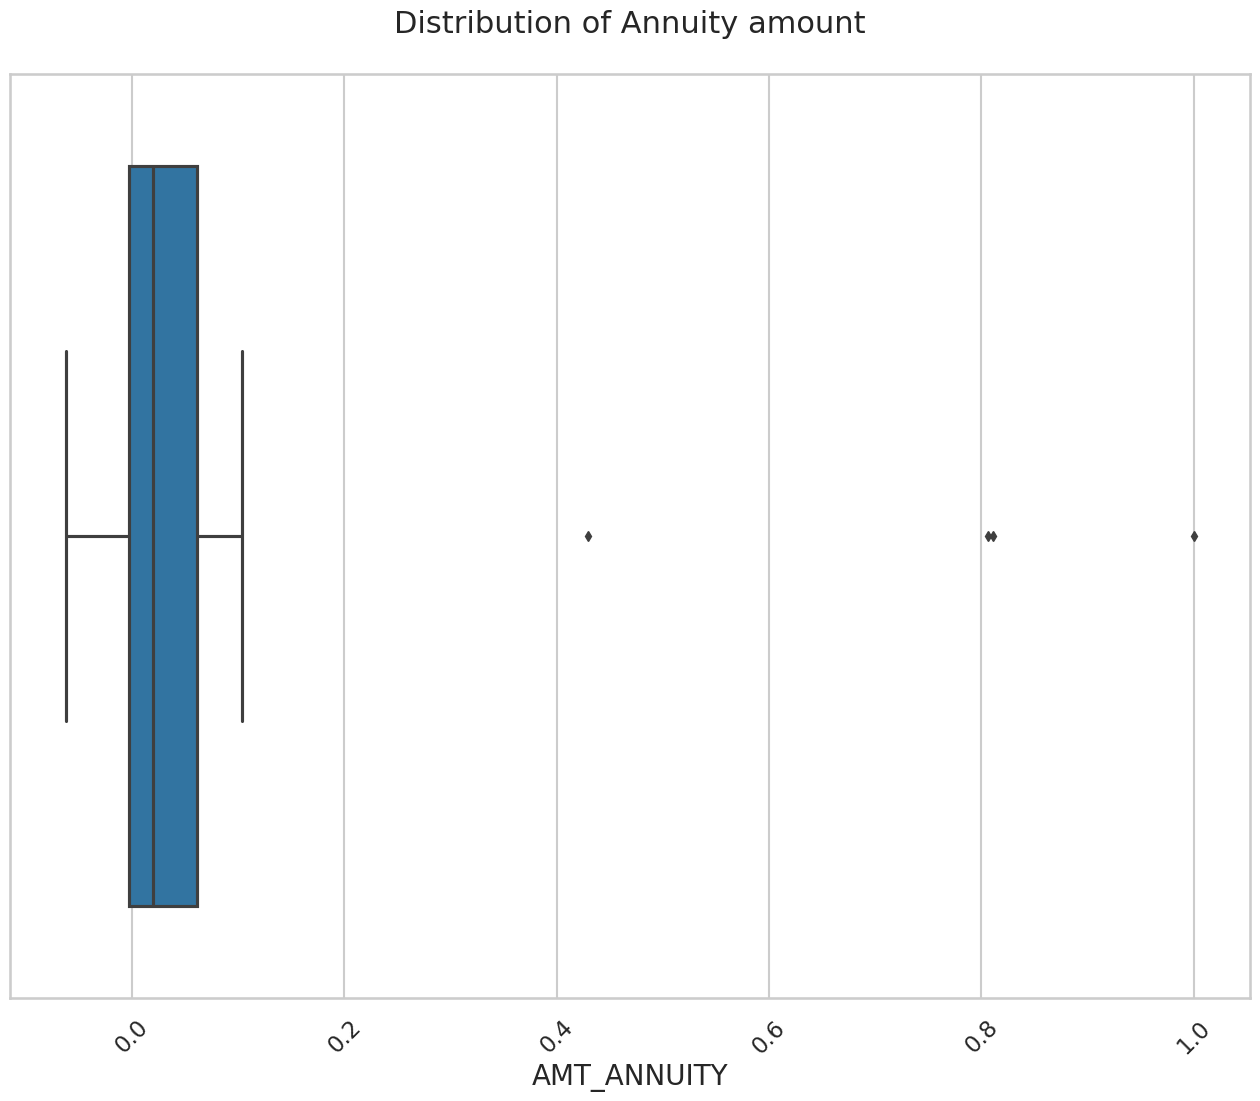

In [79]:
# Distribution of anuuity amount
univariate_numerical(data=target0,col='AMT_ANNUITY',title='Distribution of Annuity amount')

For Target 1 - Finding any outliers

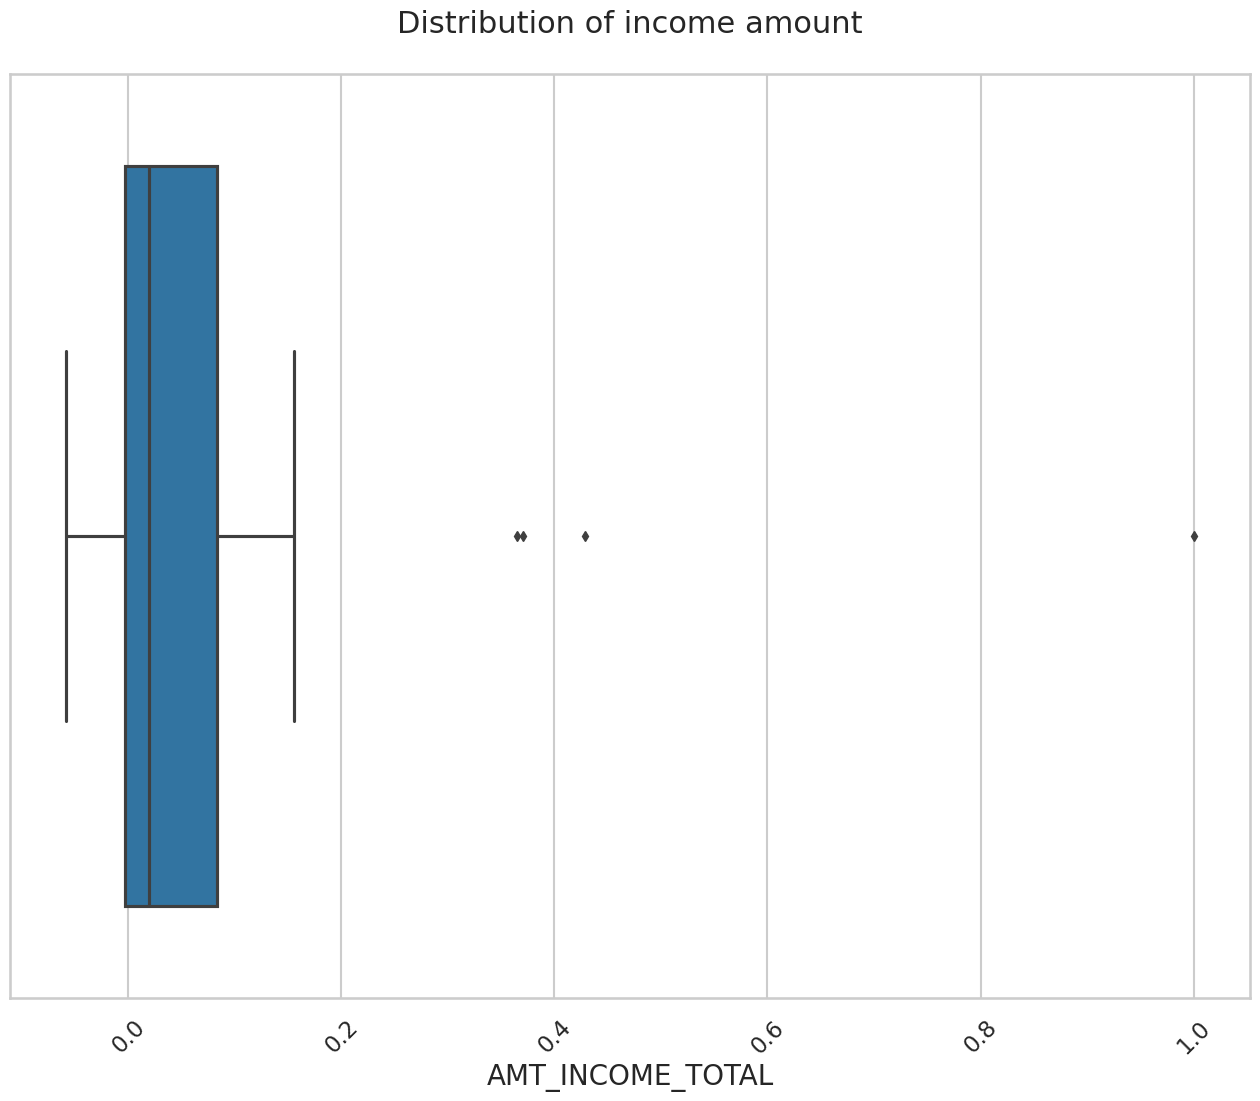

In [80]:
# Distribution of income amount
univariate_numerical(data=target1,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Conclusion:

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.
3. Most of the clients of income are present in first quartile.

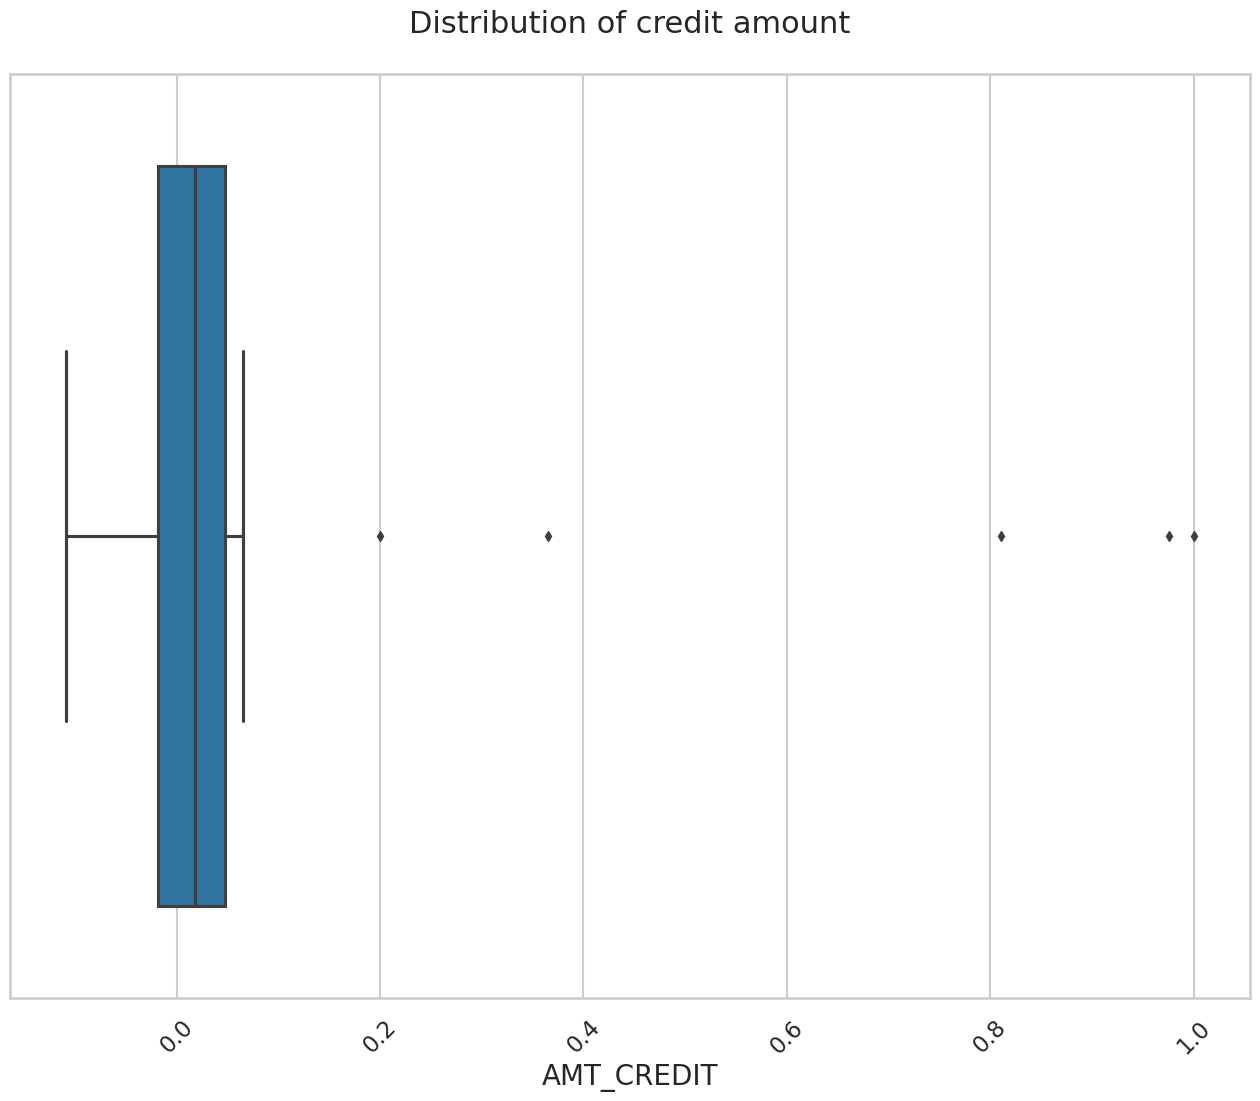

In [81]:
# Distribution of credit amount
univariate_numerical(data=target1,col='AMT_CREDIT',title='Distribution of credit amount')

Conclusion:

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

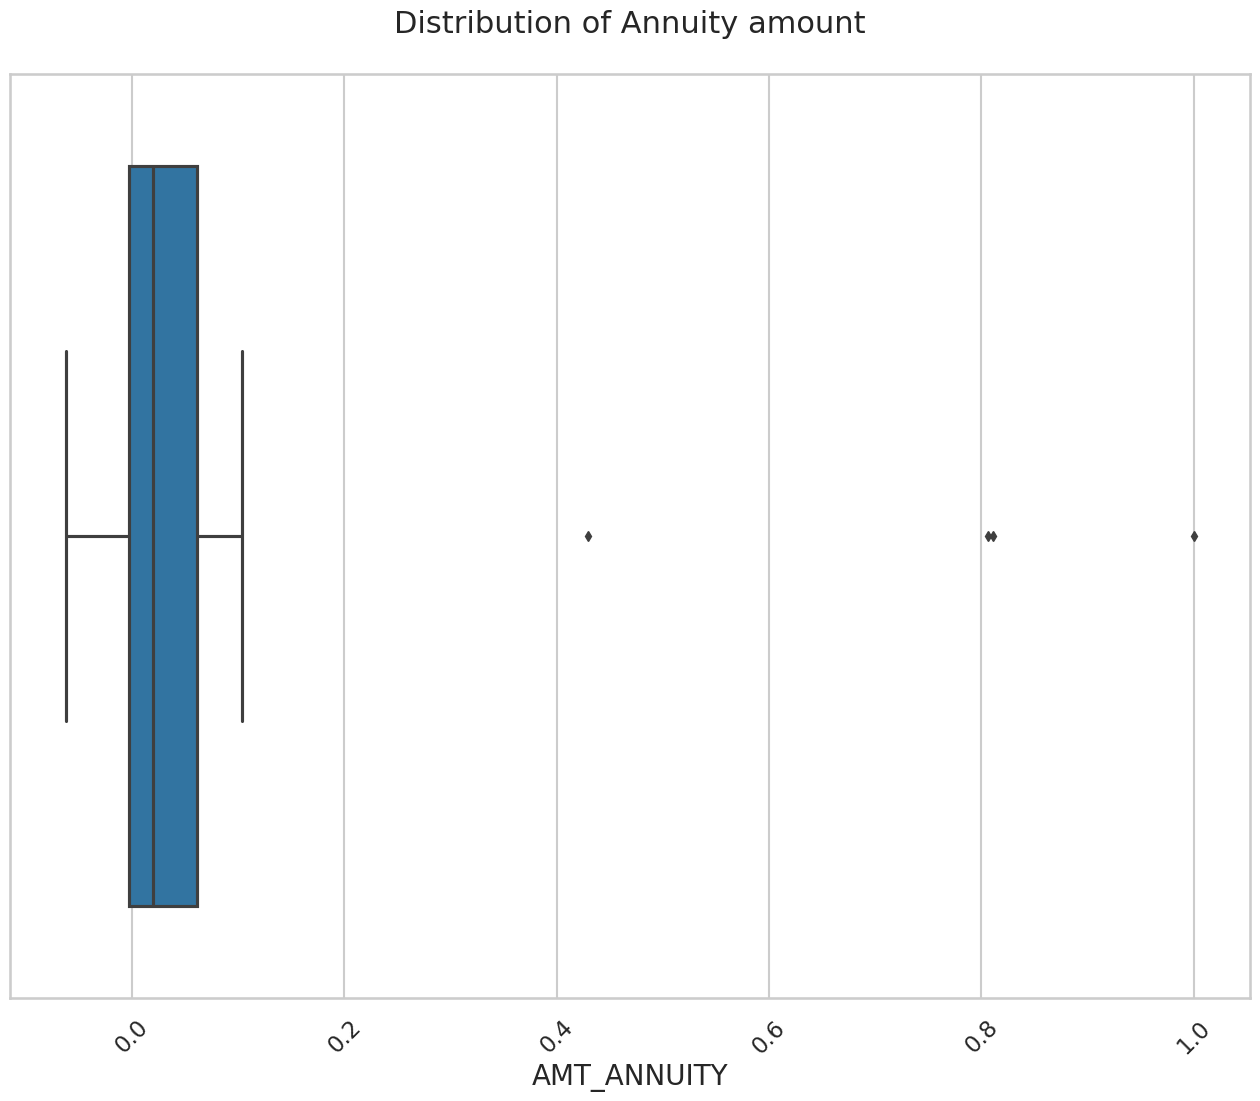

In [82]:
# Distribution of Annuity amount
univariate_numerical(data=target1,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Conclusion:

1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

Bivariate analysis for numerical variables

For Target 0

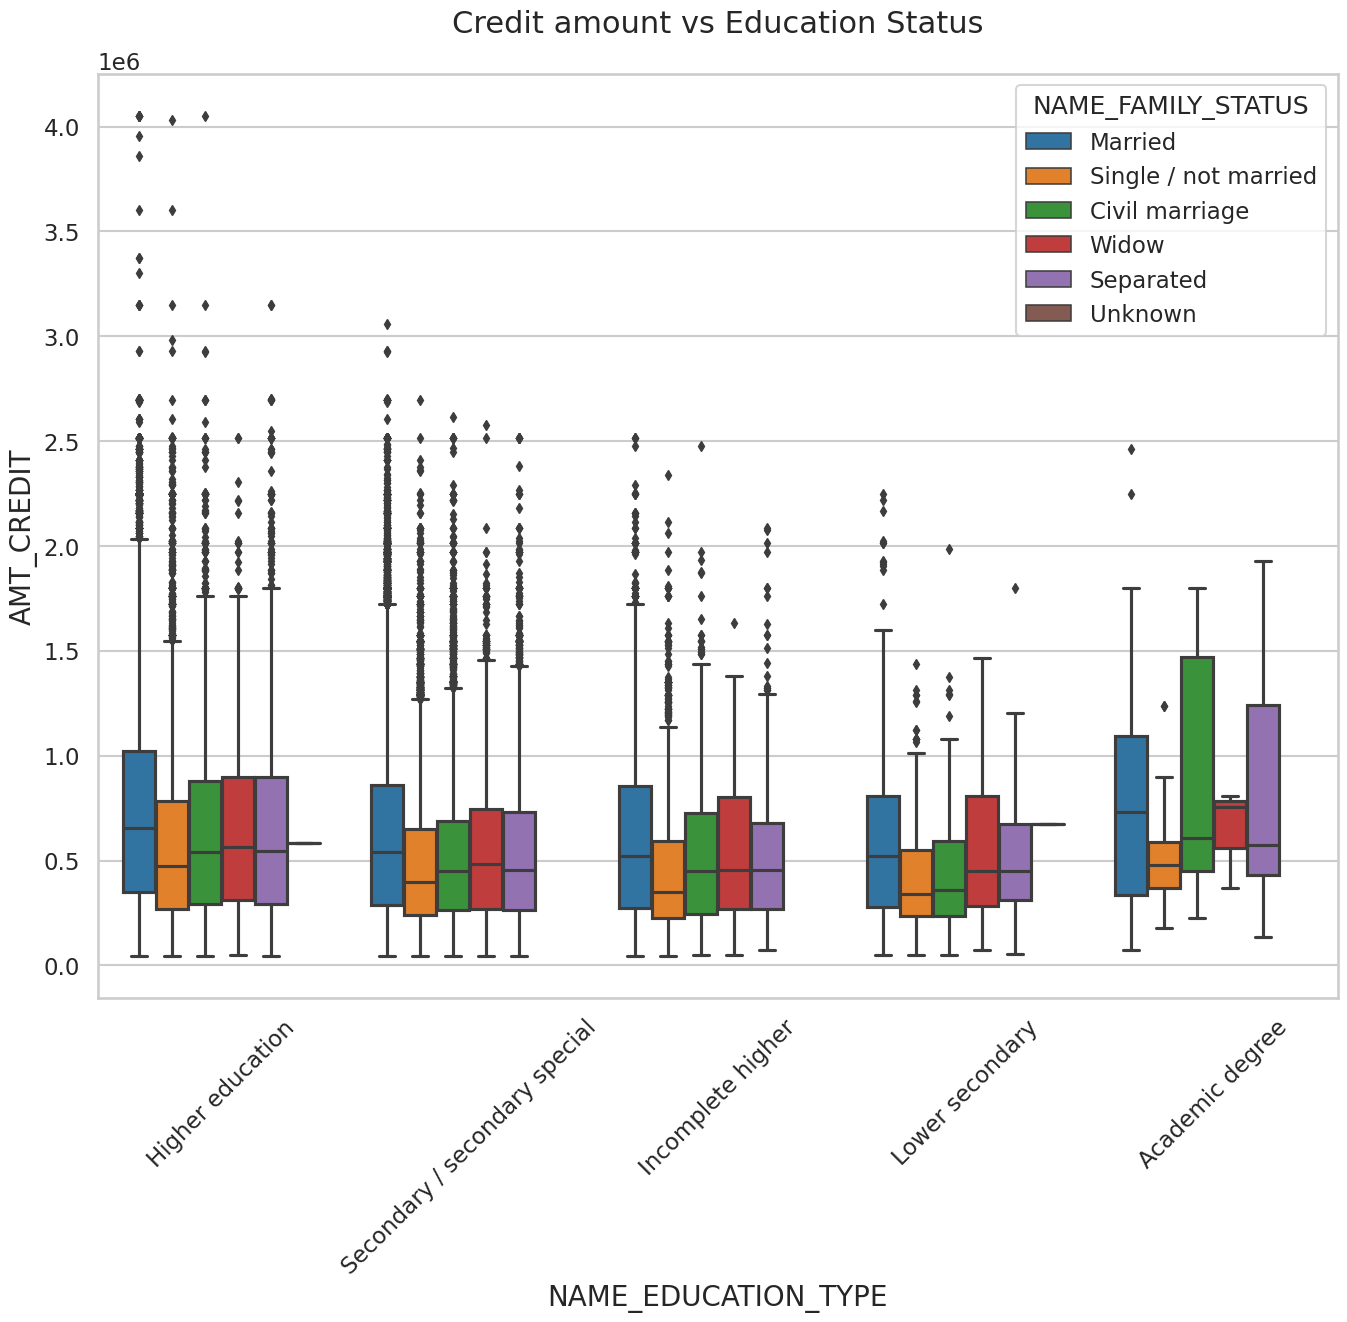

In [83]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
Civil marriage for Academic degree is having most of the credits in the third quartile.

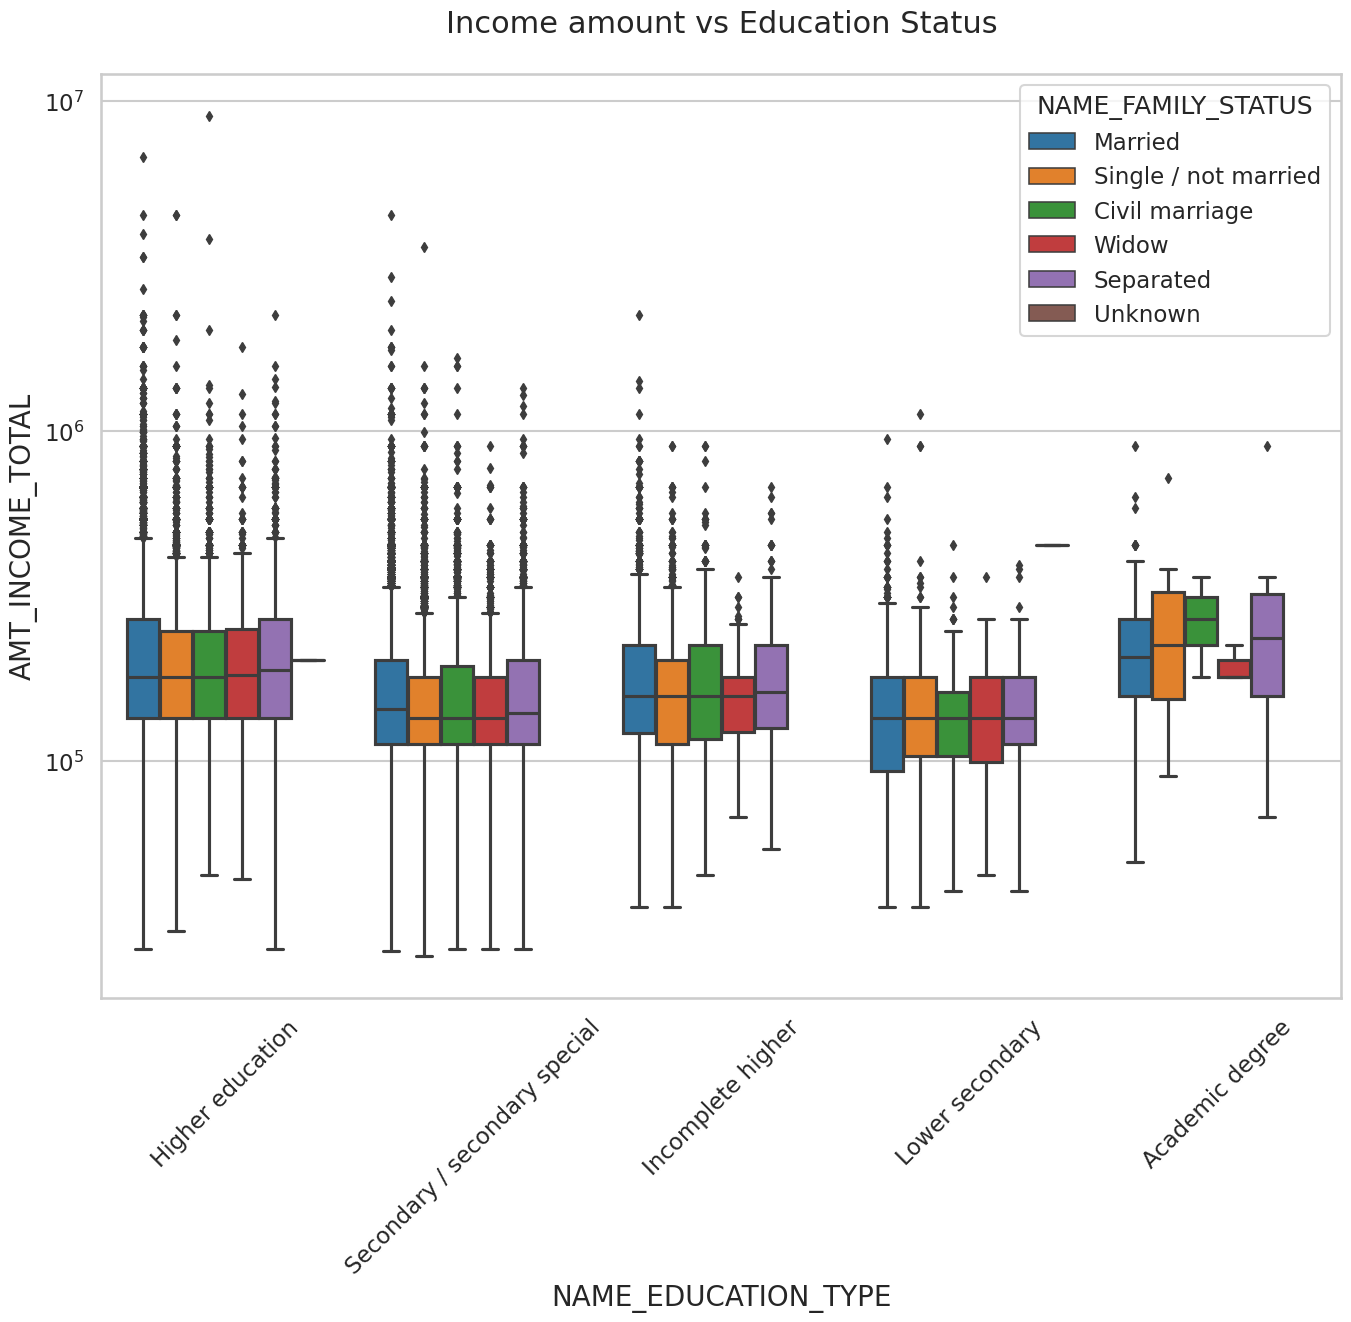

In [84]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary of civil marriage family status are have less income amount than others.

For Target 1

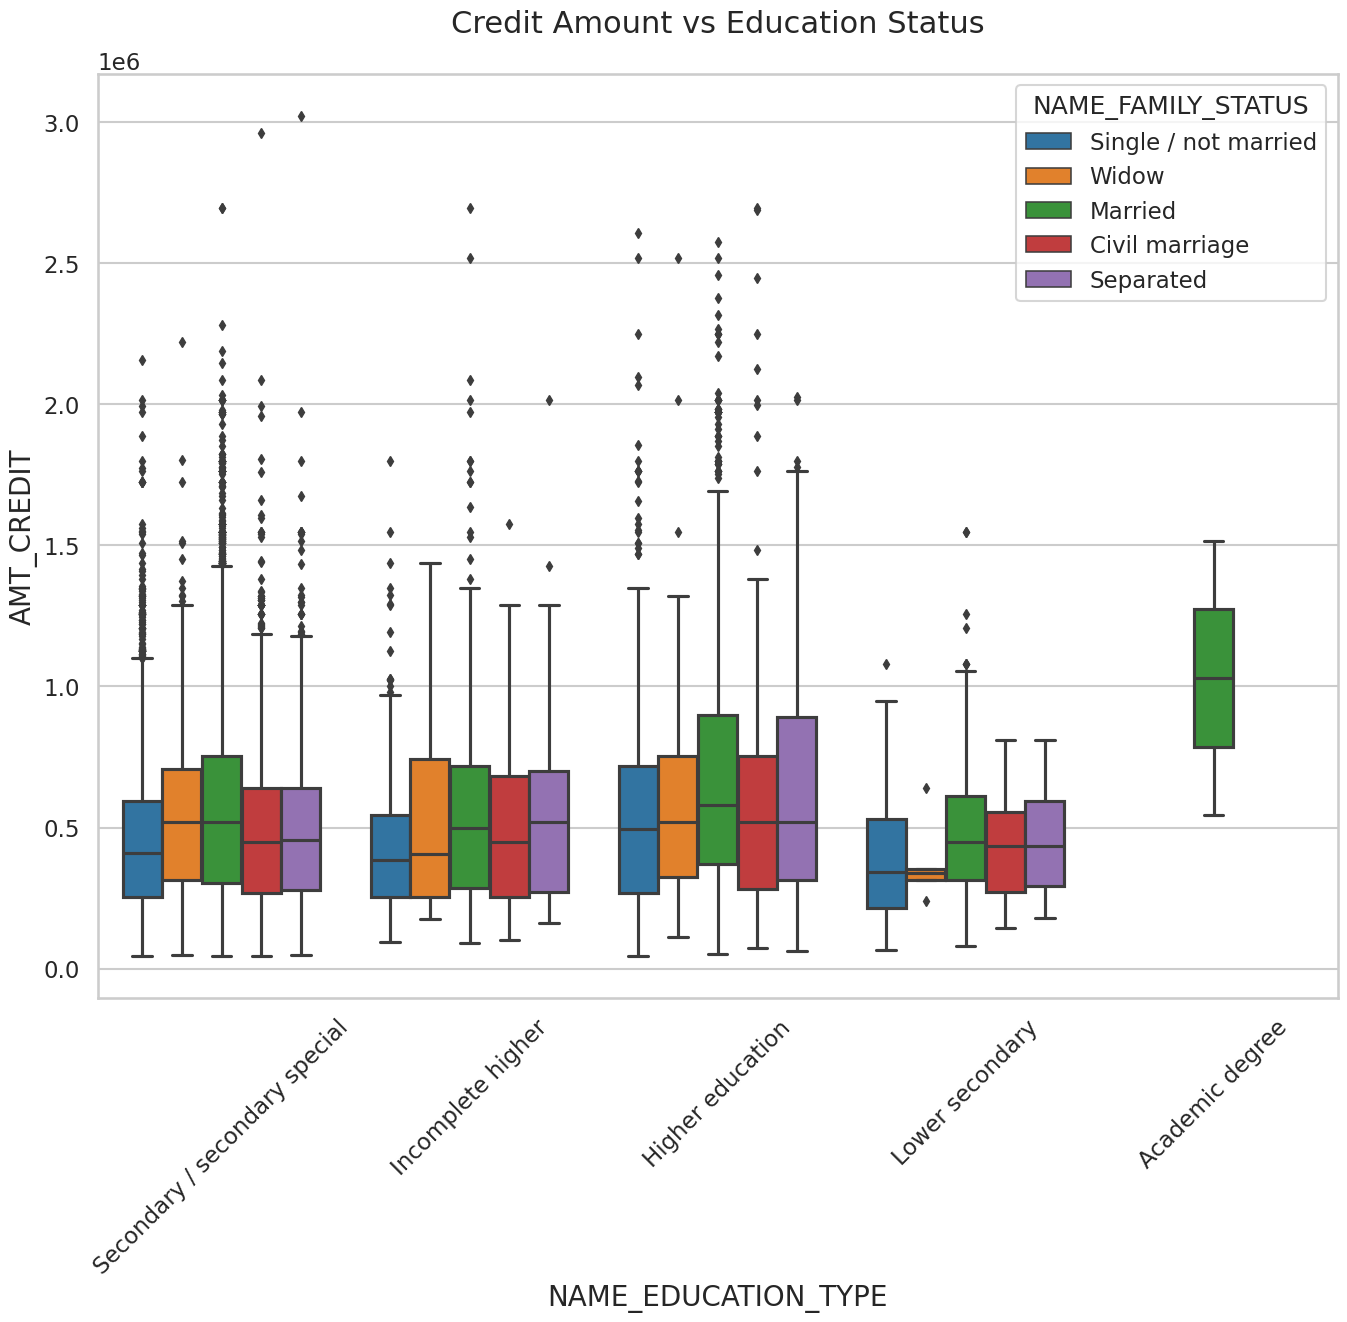

In [85]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

From the above box plot, we can conclude that the Family status of 'Separated' whose higher education is incomplete, and those 'Civil marriage' who have done their higher education are having a higher number of defaults than others.
Also, higher education and Secondary on the family status of 'marriage', 'single', and 'civil marriage' have more outliers.

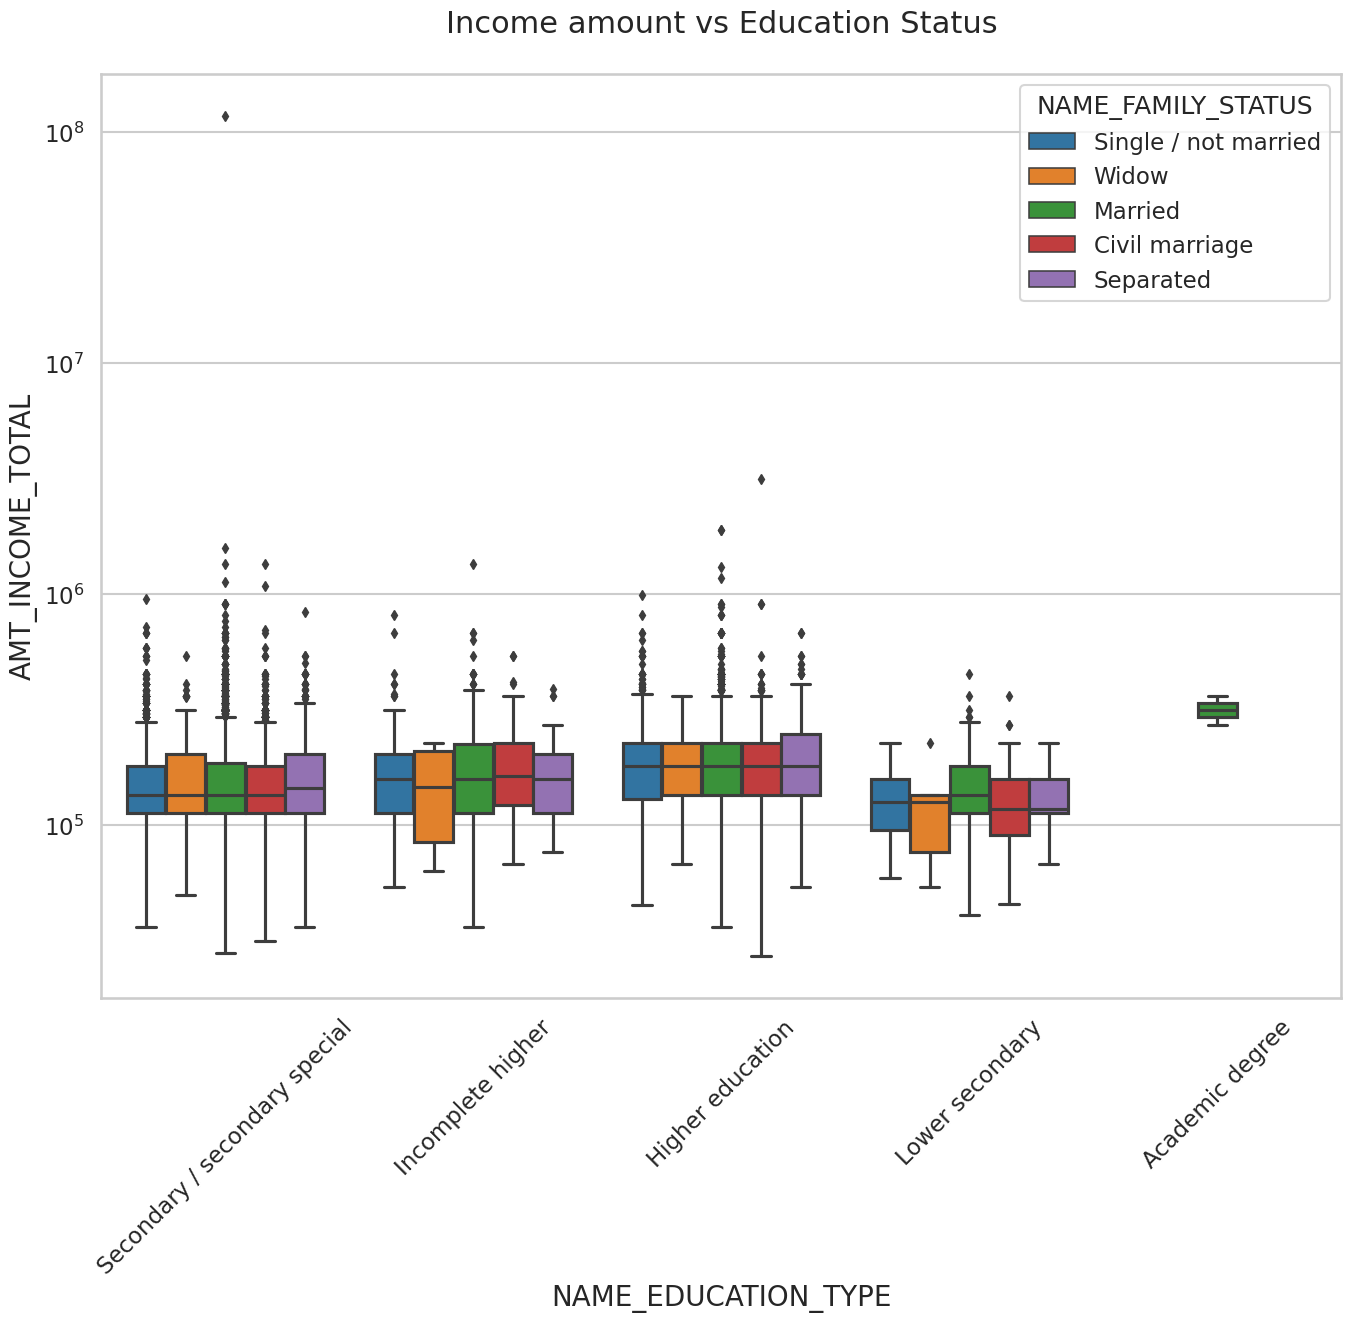

In [86]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' and 'Secondary' the income amount is mostly equal with family status. It does contain many outliers. Lower secondary of married and single family status are have less income amount than others

###Case-2

###Importing Data

In [87]:
df_pre = pd.read_csv('previous_application.csv')
df_pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df_pre.shape

(1045320, 37)

In [89]:
df_pre.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

###Data Cleaning on previous_application

In [90]:
df_pre.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.045320e+06,1.045320e+06,813133.000000,1.045320e+06,1.045320e+06,4.878690e+05,8.051730e+05,1.045320e+06,1.045320e+06,487869.000000,3712.000000,3712.000000,1.045320e+06,1.045319e+06,813135.000000,626159.000000,626159.000000,626159.000000,626159.000000,626159.000000,626159.000000
mean,1.922698e+06,2.784412e+05,15886.005324,1.741794e+05,1.949122e+05,6.700192e+03,2.261523e+05,1.248445e+01,9.964155e-01,0.079623,0.187188,0.774812,-8.822477e+02,3.186709e+02,15.989548,342381.717089,13827.777445,33612.673976,76603.833884,82002.047633,0.331499
std,5.329309e+05,1.028576e+05,14741.449516,2.909309e+05,3.168019e+05,2.077842e+04,3.132836e+05,3.332907e+00,5.976372e-02,0.107887,0.083441,0.099556,7.793216e+02,8.008454e+03,14.502365,88605.677903,72446.061029,106640.740098,149662.059023,153309.552389,0.470752
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460567e+06,1.893890e+05,6300.000000,1.893038e+04,2.428650e+04,0.000000e+00,5.057100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.303000e+03,-1.000000e+00,6.000000,365243.000000,-1626.000000,-1241.000000,-1313.000000,-1269.000000,0.000000
50%,1.923389e+06,2.788210e+05,11250.000000,7.078950e+04,8.023950e+04,1.624500e+03,1.114650e+05,1.200000e+01,1.000000e+00,0.051099,0.189122,0.835095,-5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,0.000000
75%,2.384338e+06,3.677480e+05,20516.400000,1.800000e+05,2.150932e+05,7.753500e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.810000e+02,8.500000e+01,24.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,1.000000,1.000000,-2.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [91]:
df_pre.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [92]:
df_null_1 = df_pre.isnull().sum()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_null_1

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     232187
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_DOWN_PAYMENT                557451
AMT_GOODS_PRICE                 240147
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               557451
RATE_INTEREST_PRIMARY          1041608
RATE_INTEREST_PRIVILEGED       1041608
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 513510
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  1
NAME_PORTFOLIO                       1
NAME_PRODUCT_TYPE                    1
CHANNEL_TYPE             

In [93]:
df_percent1 = round((100*df_pre.isnull().sum()/len(df_pre)), 2).sort_values(ascending=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_percent1

SK_ID_PREV                      0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_PAYMENT_TYPE               0.00
AMT_APPLICATION                 0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
NAME_CONTRACT_TYPE              0.00
SK_ID_CURR                      0.00
PRODUCT_COMBINATION             0.02
AMT_ANNUITY                    22.21
CNT_PAYMENT                    22.21
AMT_GOODS_PRICE                22.97
DAYS_LAST_DUE                  40.10
D

In [94]:
len(df_percent1)

37

### Drop columns if missing values > 40%

In [95]:
threshold1 = 40
drop_cols1 = df_percent1[df_percent1 >= threshold1].index

In [96]:
len(drop_cols1)

11

In [97]:
df_pre_filter = df_pre.drop(columns = drop_cols1)
df_pre_filter

In [98]:
df_pre_filter.shape

(1045320, 26)

In [99]:
df_pre_filter.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high


In [100]:
df_percent_p = round((100*df_pre_filter.isnull().sum()/len(df_pre)), 2).sort_values(ascending=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_percent_p

SK_ID_PREV                      0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
NAME_PAYMENT_TYPE               0.00
DAYS_DECISION                   0.00
NAME_YIELD_GROUP                0.00
NAME_CONTRACT_STATUS            0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
NAME_CONTRACT_TYPE              0.00
SK_ID_CURR                      0.00
NAME_CASH_LOAN_PURPOSE          0.00
PRODUCT_COMBINATION             0.02
AMT_ANNUITY                    22.21
CNT_PAYMENT                    22.21
AMT_GOODS_PRICE                22.97
dtype: float64

In [101]:
# Removing the column values of 'XNA' and 'XAP'

df_pre_filter=df_pre_filter.drop(df_pre_filter[df_pre_filter['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_pre_filter=df_pre_filter.drop(df_pre_filter[df_pre_filter['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_pre_filter=df_pre_filter.drop(df_pre_filter[df_pre_filter['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df_pre_filter.shape

(43195, 26)

###Merging the Application dataset with previous appliaction dataset

In [102]:
new_df = pd.merge(left=df_app_filter,right=df_pre_filter,how='inner',on='SK_ID_CURR',suffixes='_x')

Renaming the column names after merging

In [103]:
new_df_1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

Removing unwanted columns for analysis

In [105]:
new_df_1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

###Univariate analysis

1. Distribution of contract status

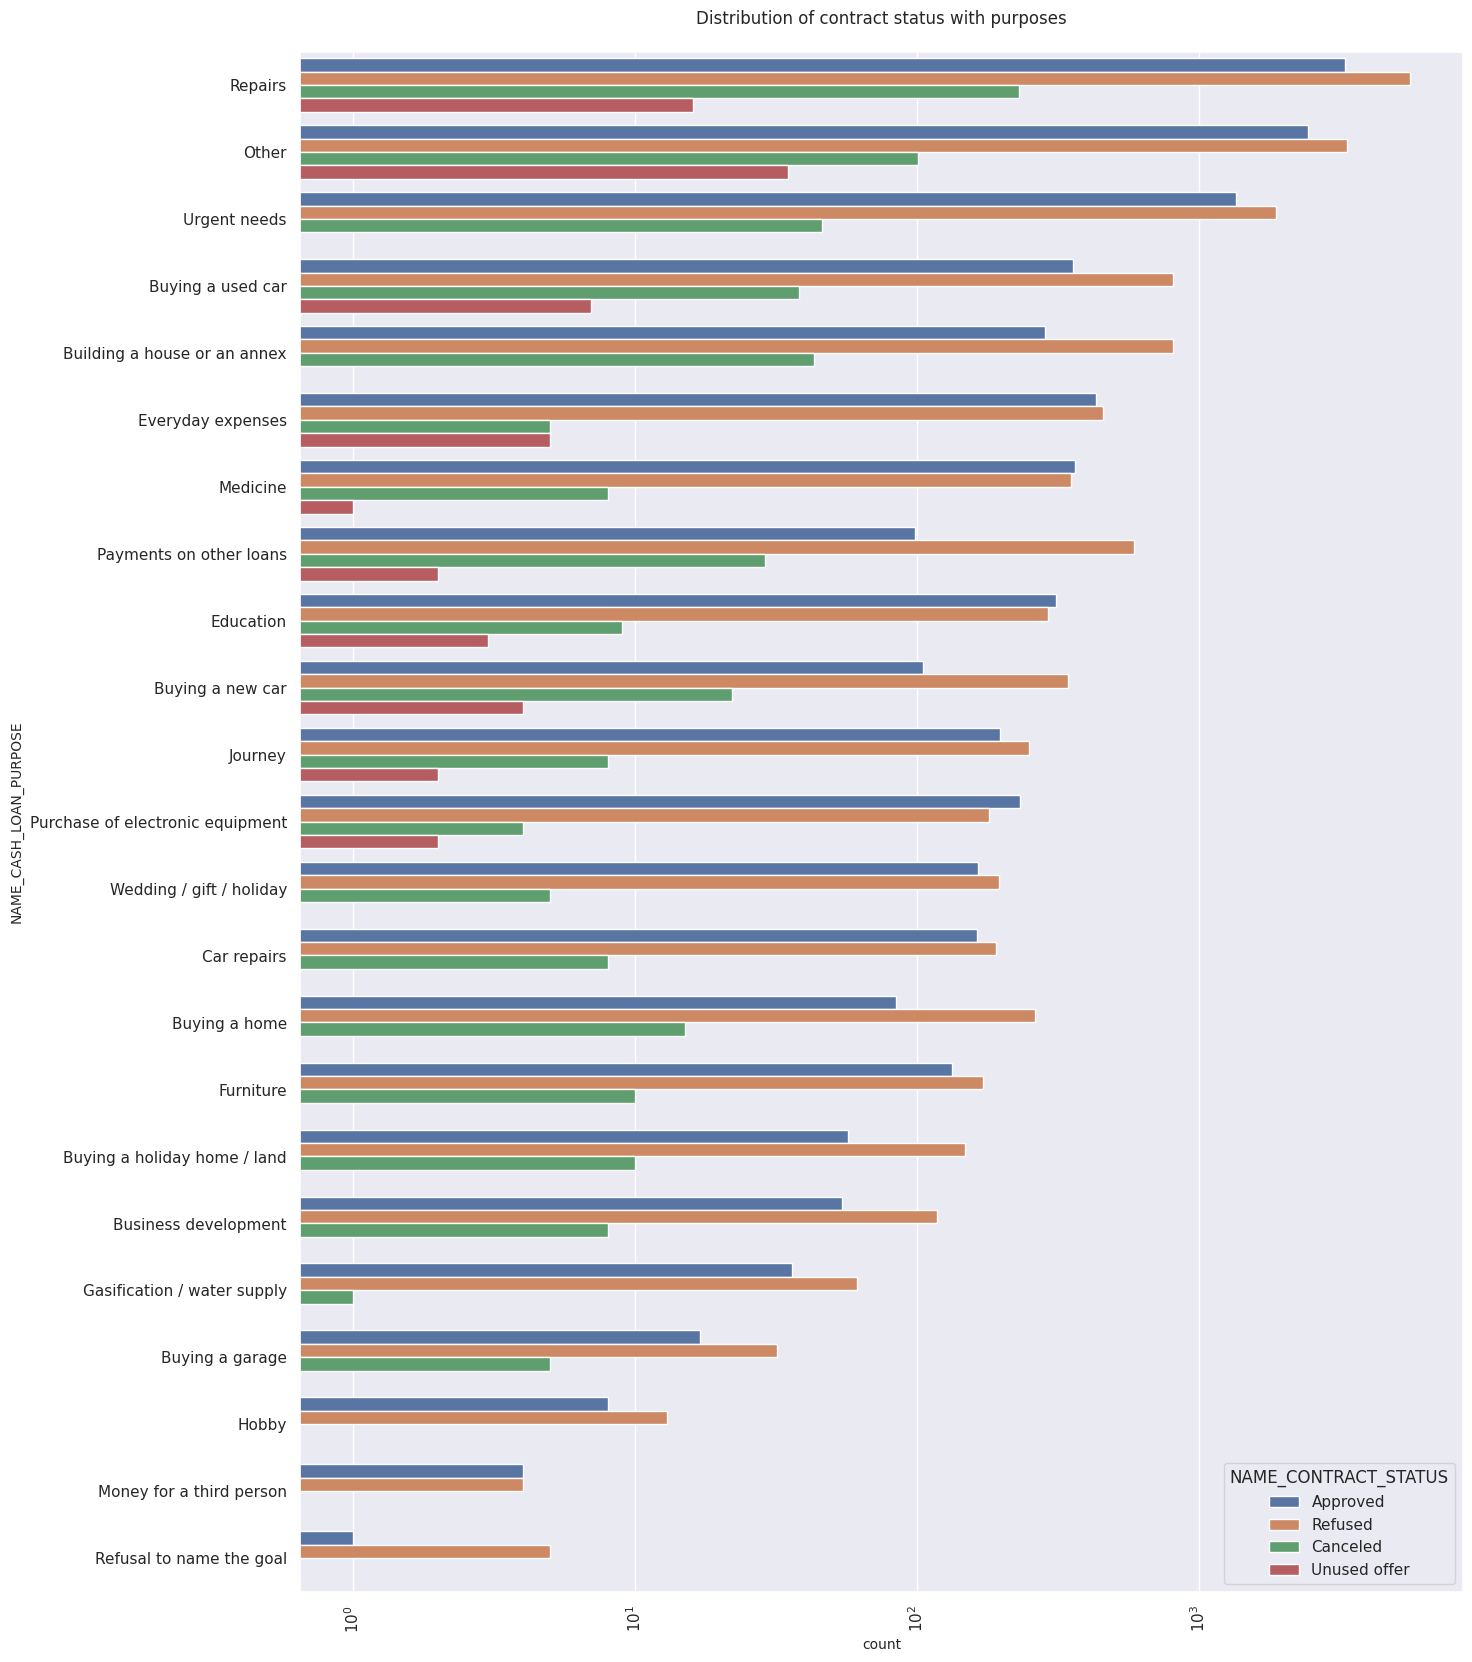

In [106]:
sns.set_style('darkgrid')
sns.set_context('notebook')

plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.titlepad'] = 20
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df_1, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=new_df_1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep')

Conclusion:

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection.
3. Paying other loans and buying a new car is having significant higher rejection than approves.

2. Distribution of purposes with target

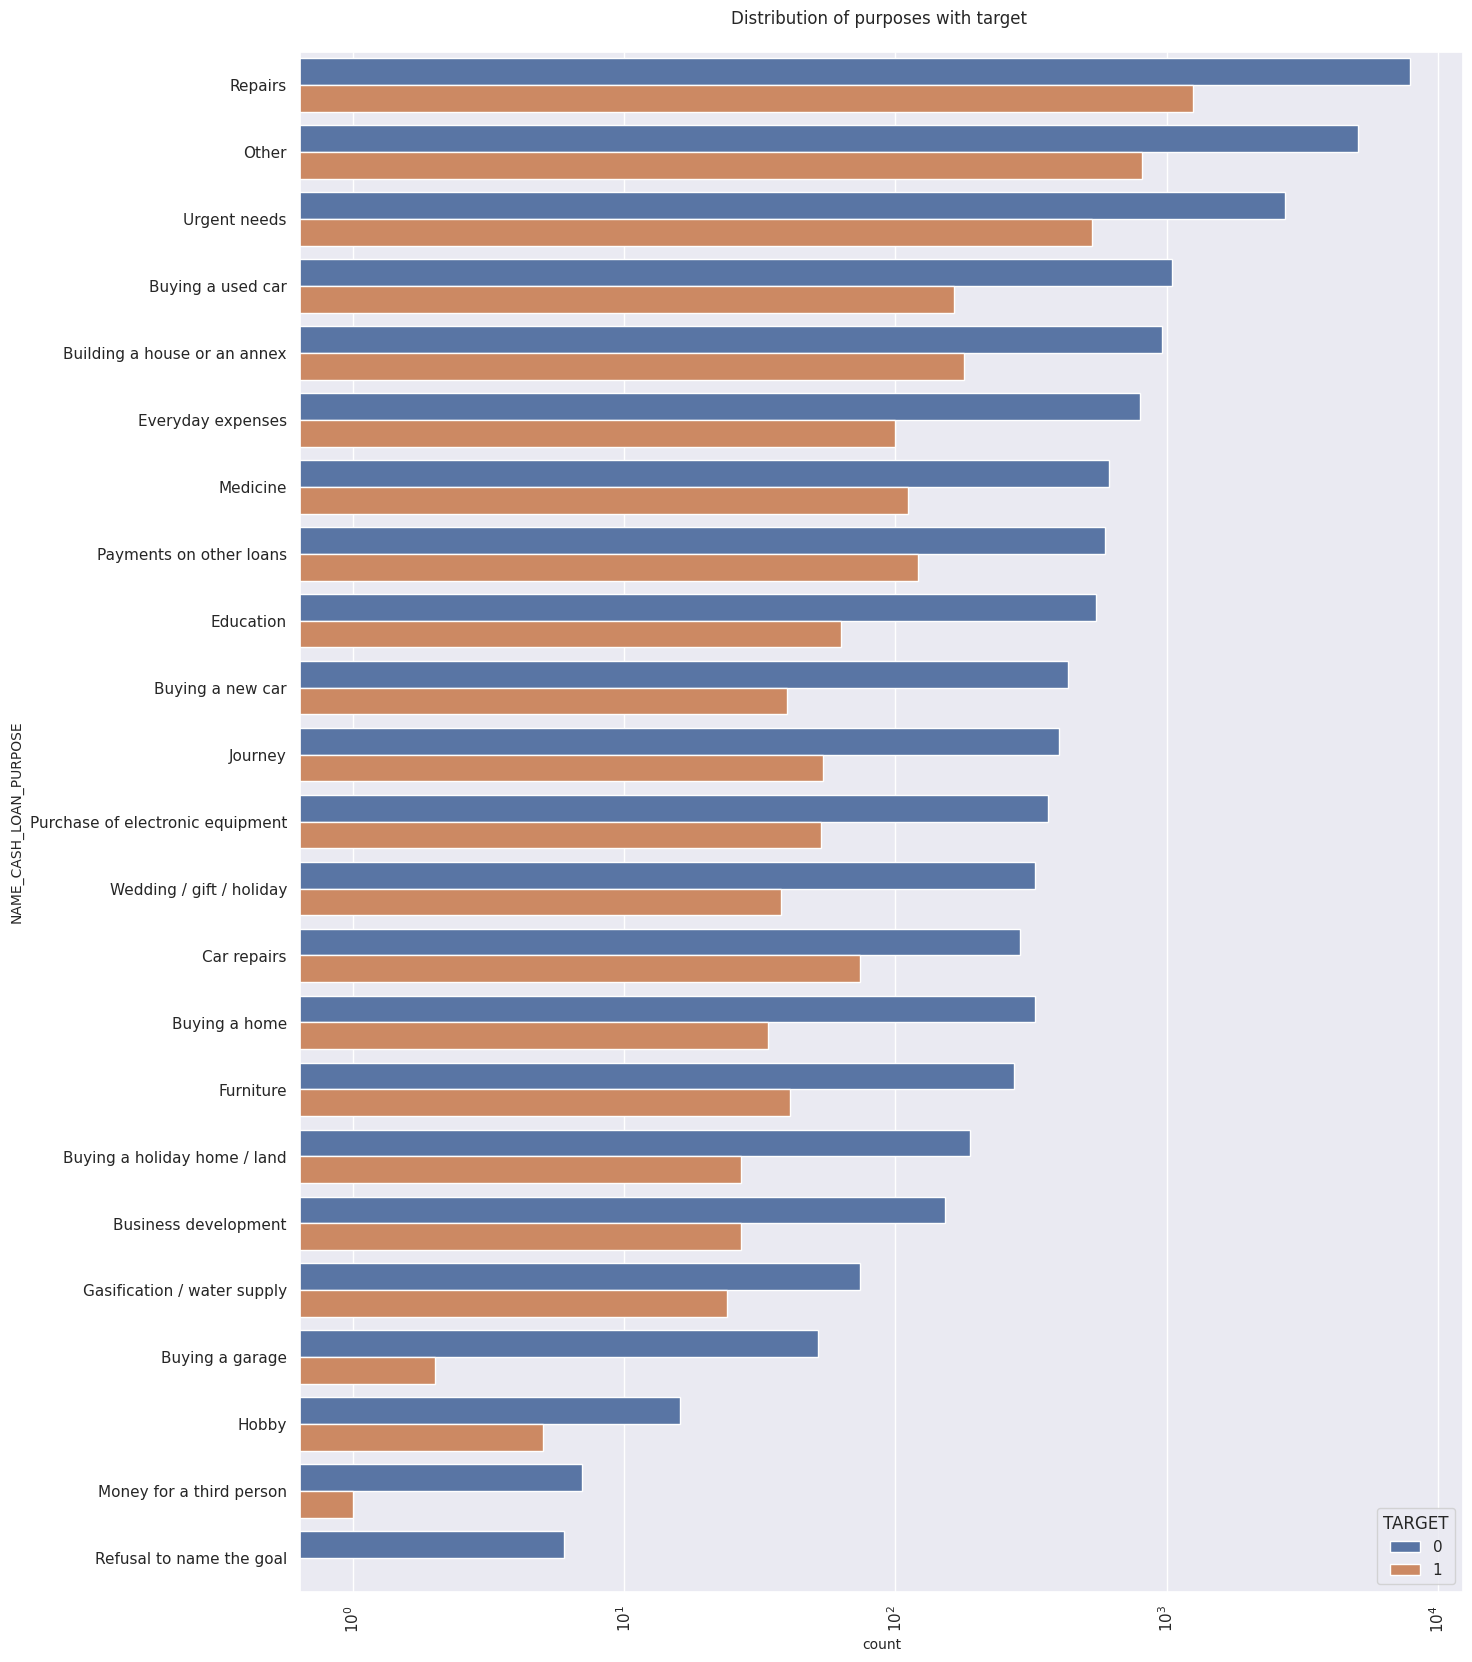

In [108]:
sns.set_style('darkgrid')
sns.set_context('notebook')

plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.titlepad'] = 20
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df_1, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=new_df_1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='deep')

Conclusion:

1. Loan purposes with 'Repairs' are facing more difficulties in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties.
    They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'
Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

###Bivariate analysis

1. Credit amount

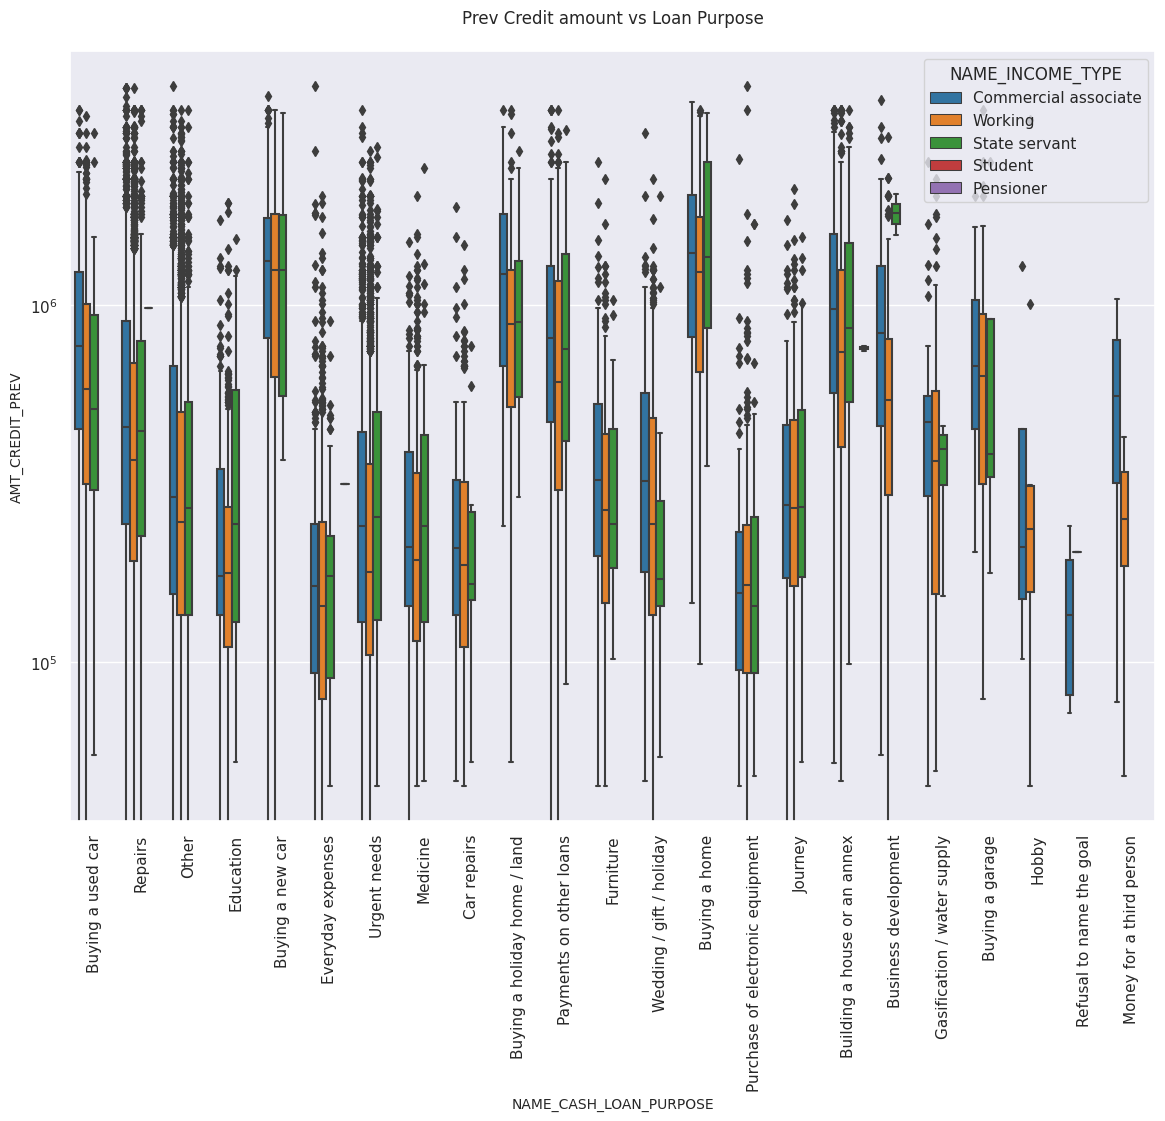

In [109]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df_1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

Conclusion:

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied.

2. Credit amount prev vs Housing type

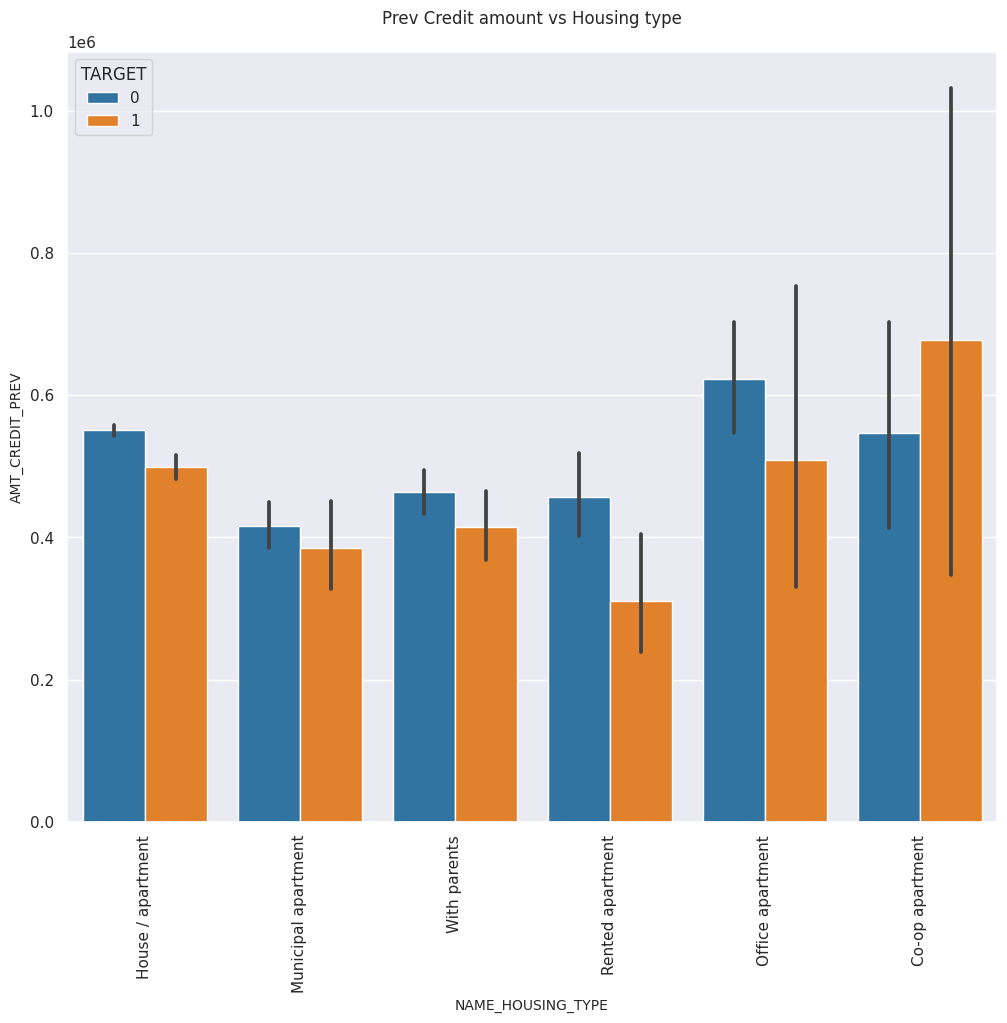

In [110]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
sns.barplot(data =new_df_1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

#CONCLUSION

1. For payments to be successful, banks should concentrate more on contract types such as "student," "pensioner," and "businessman" with housing types other than "co-op apartments."

2. Banks should pay less attention to "working" income types because they account for the majority of failure payments.

3. Additionally, "Repair" loans have a higher percentage of late or missed payments.

4. Acquire as many clients as possible from the dwelling type "With parents" since they have the fewest failed payments.